In [1]:
library(hdf5r)
library(Seurat)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)
library(DoubletFinder)
library(ggplot2)
library(ggpubr)
library(plyr)

Attaching SeuratObject


载入程辑包：‘purrr’


The following object is masked from ‘package:hdf5r’:

    flatten_df



载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


载入程辑包：‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




In [2]:
merged_data = readRDS('~/HPV/res/seurat_rds/merged_data.rds')

In [3]:
unique(merged_data$major)

[1] "T"           "B"           "NK"          "pDC"         "Fibroblast" 
 [6] "Endothelial" "Neutrophil"  "Epithelial"  "DC"          "Macrophage" 
[11] "Monocyte"    "Plasma"      "Mast"

# T

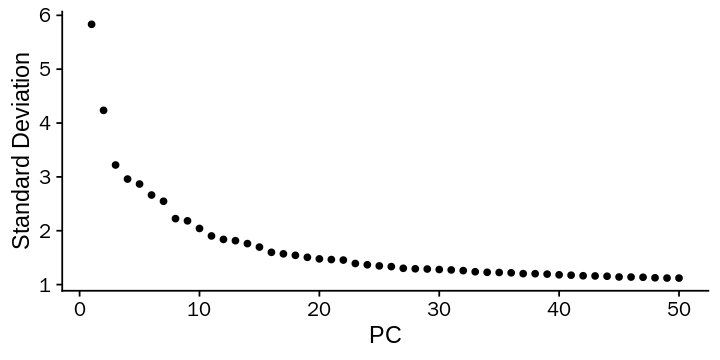

In [4]:
temp = merged_data[,merged_data$major %in% c('T')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [5]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [6]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1')

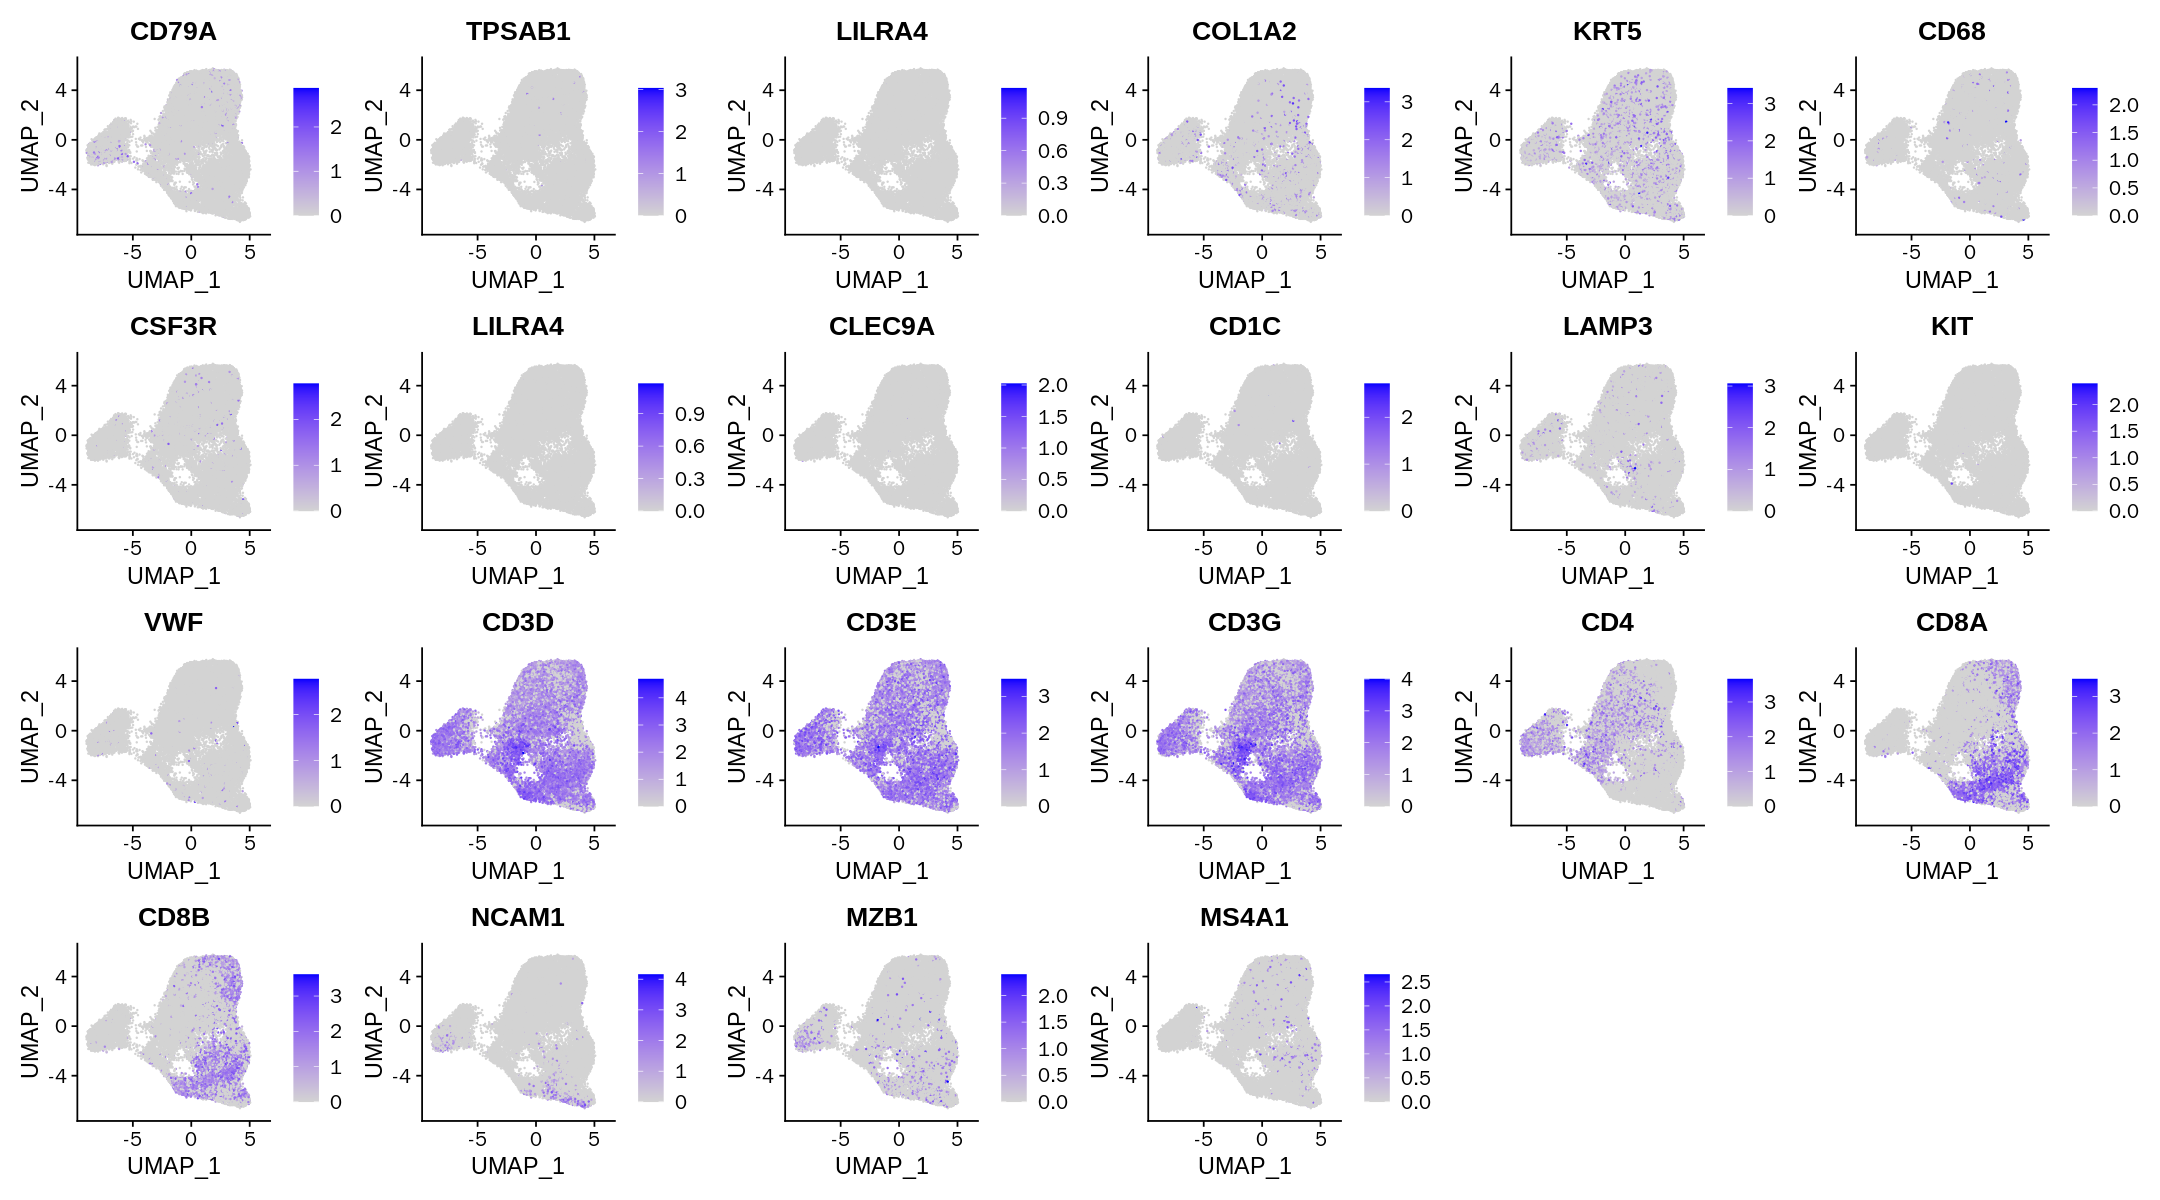

In [7]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

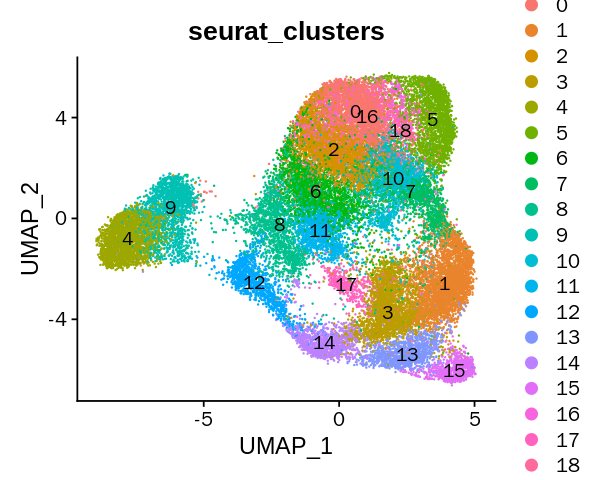

In [8]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [9]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('13','15')]

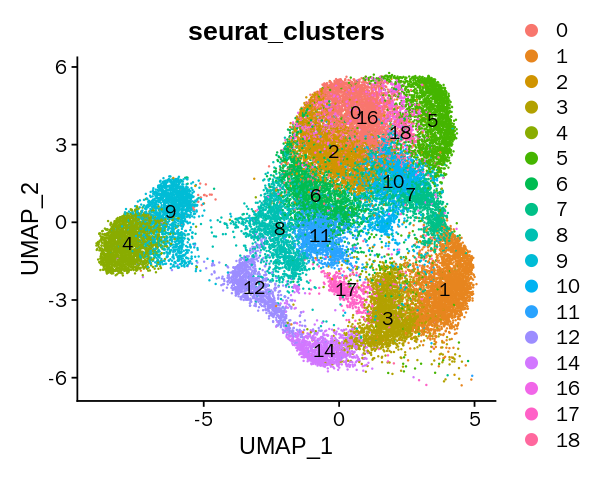

In [10]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [11]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# NK

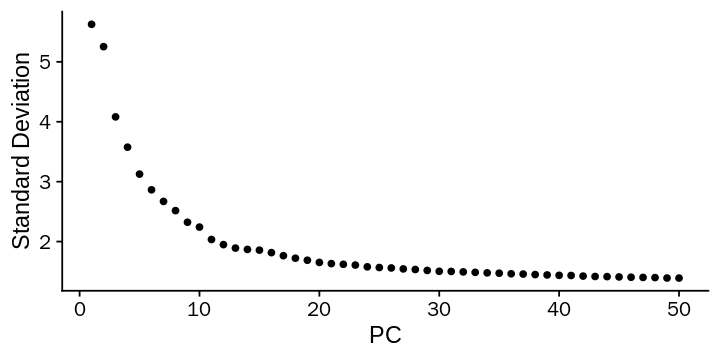

In [12]:
temp = merged_data[,merged_data$major %in% c('NK')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [13]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [14]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1')

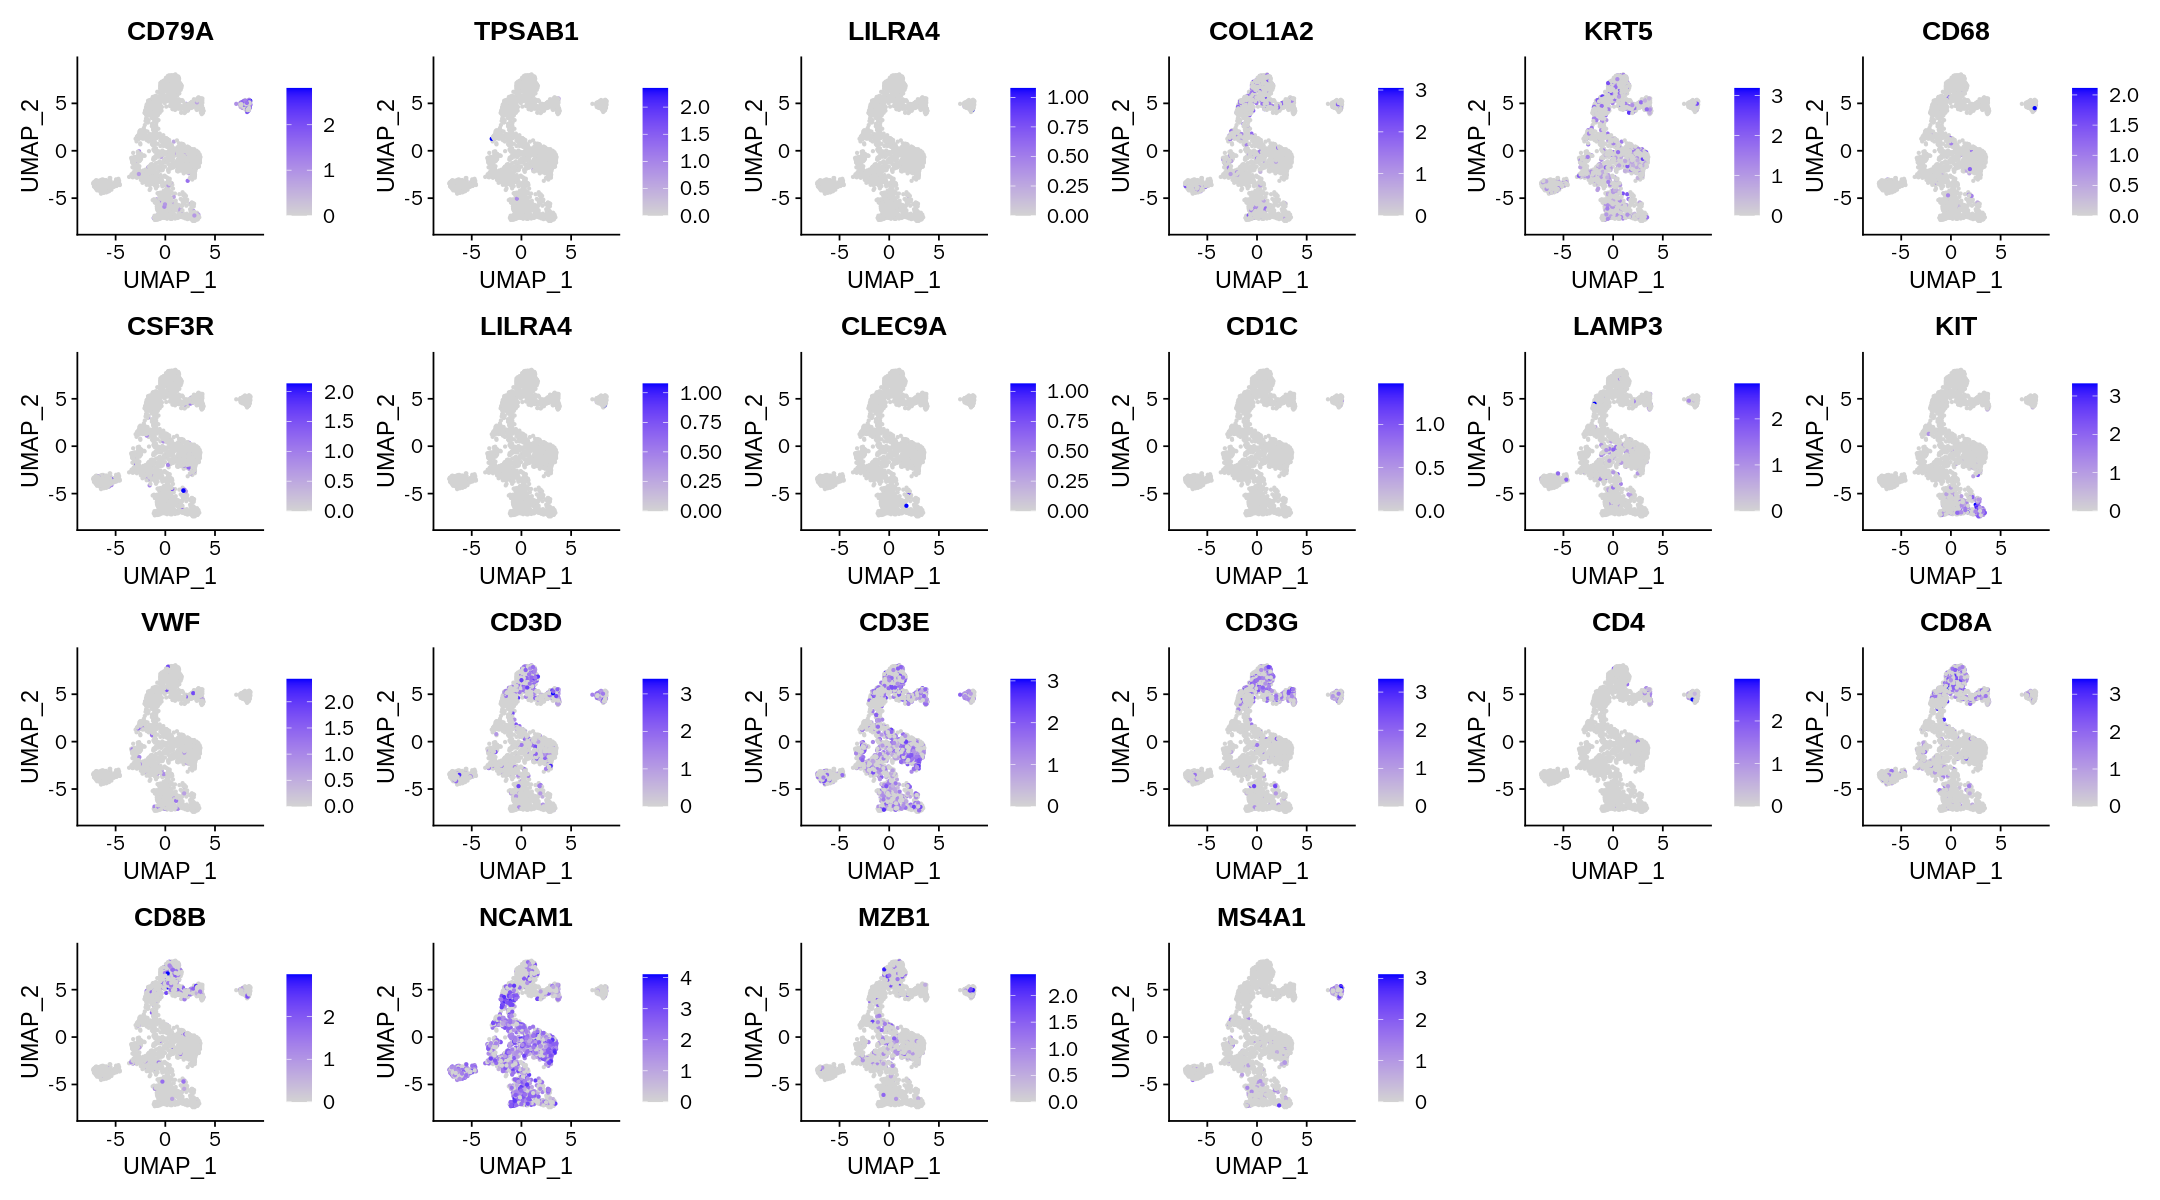

In [15]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

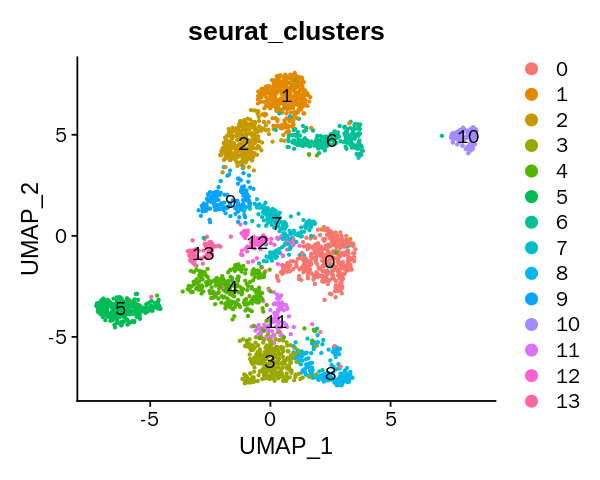

In [16]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [17]:
table(sub$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13 
374 332 322 302 282 263 214 181 166 146 101  88  79  73 

In [18]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('1','6','10','8')]

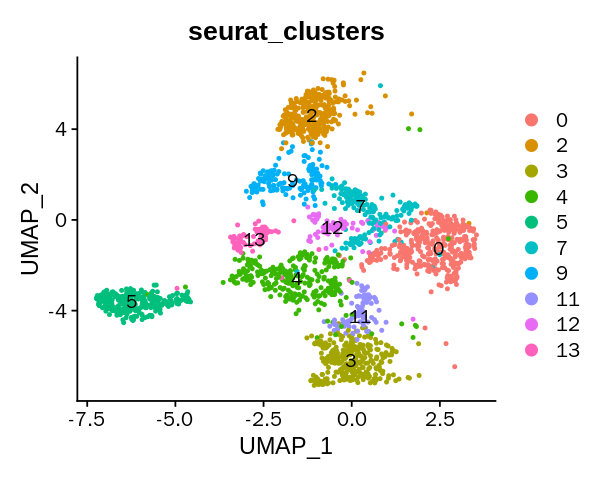

In [19]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [20]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# B

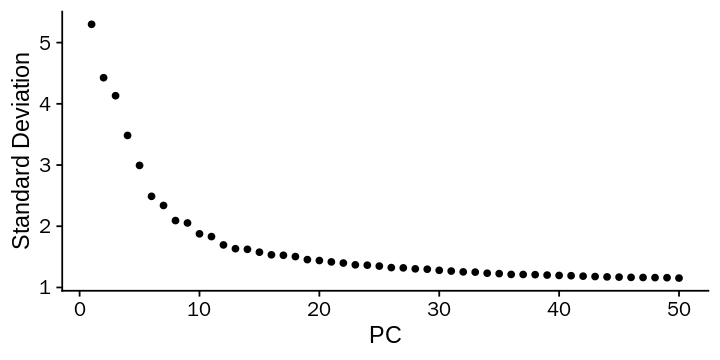

In [21]:
temp = merged_data[,merged_data$major %in% c('B')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [22]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [23]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1')

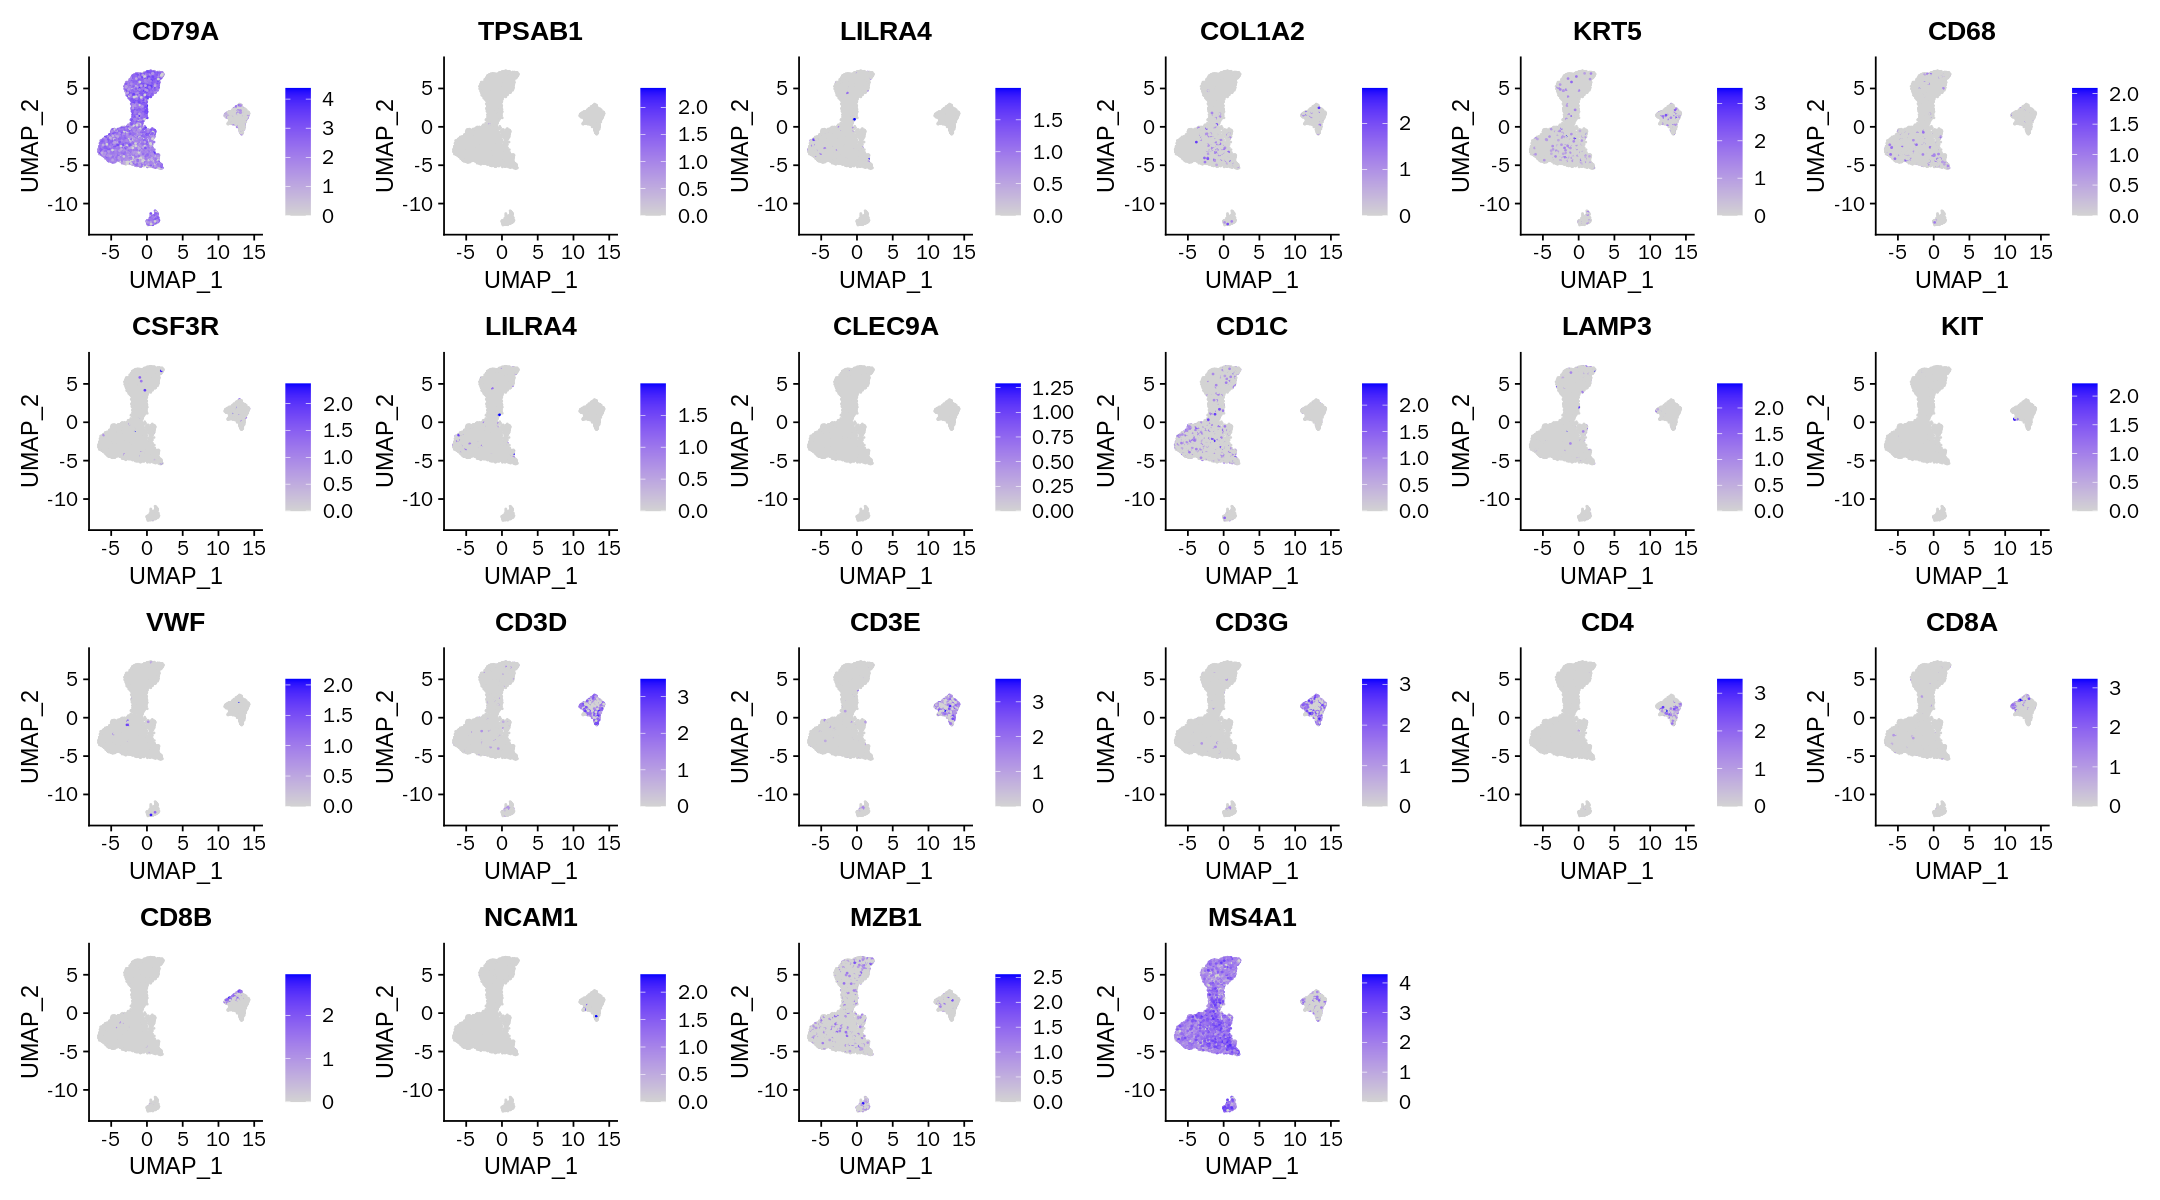

In [24]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

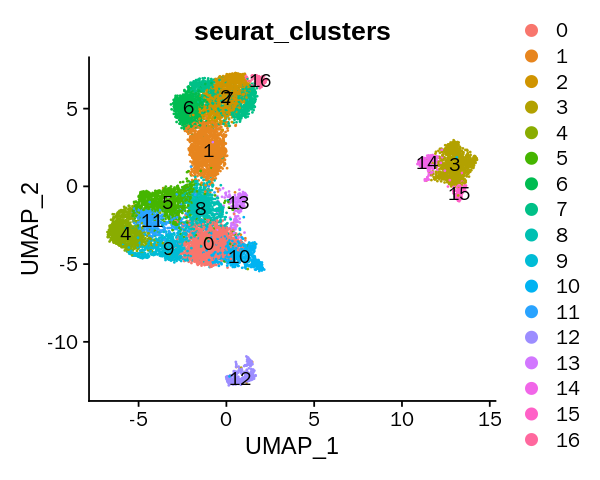

In [25]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [26]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('14','3','15')]

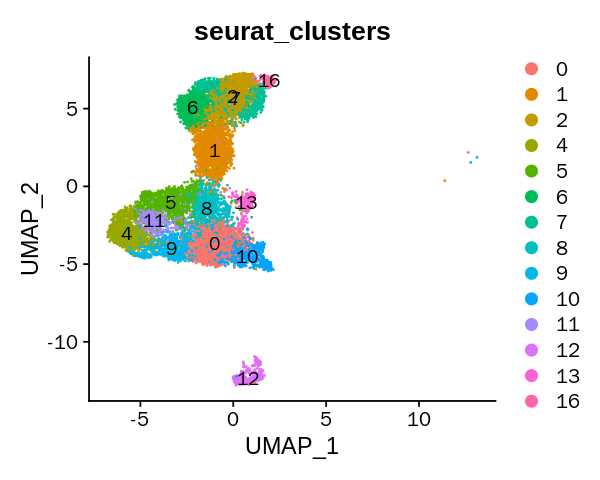

In [27]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [28]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Plasma

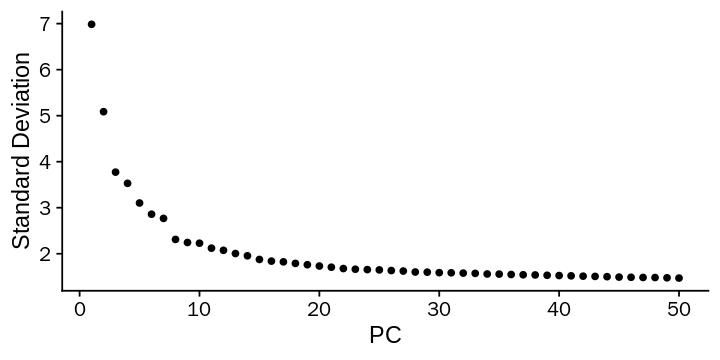

In [29]:
temp = merged_data[,merged_data$major %in% c('Plasma')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [30]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [31]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1')

Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of TPSAB1.”


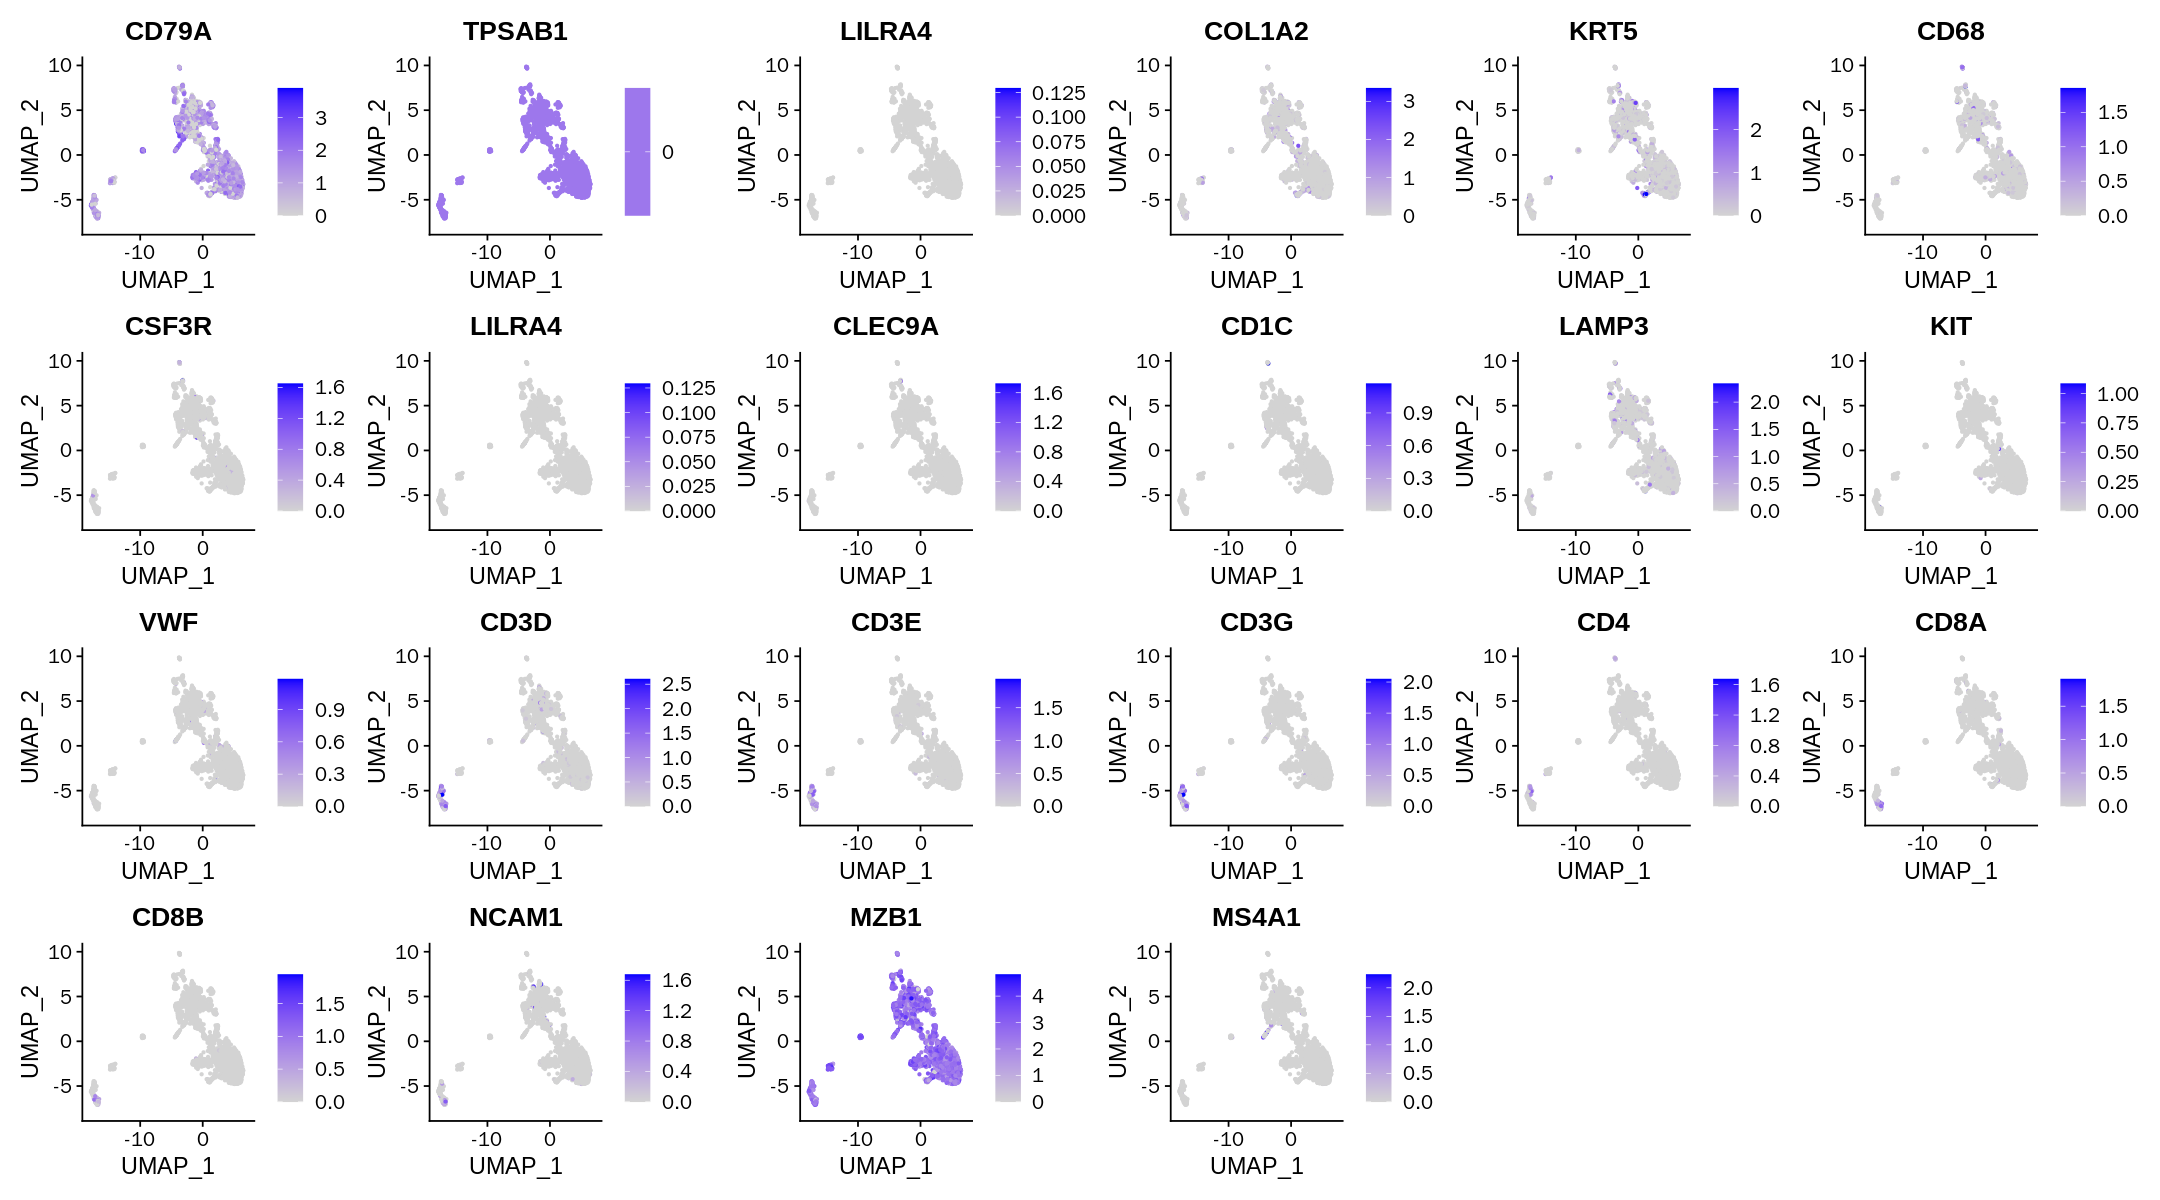

In [32]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

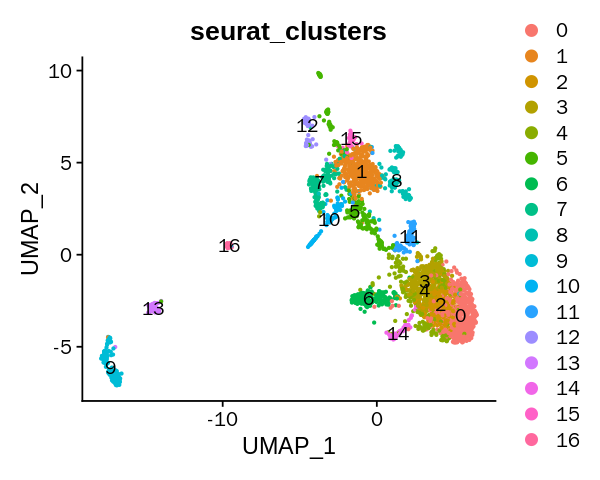

In [33]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [34]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('9','14')]

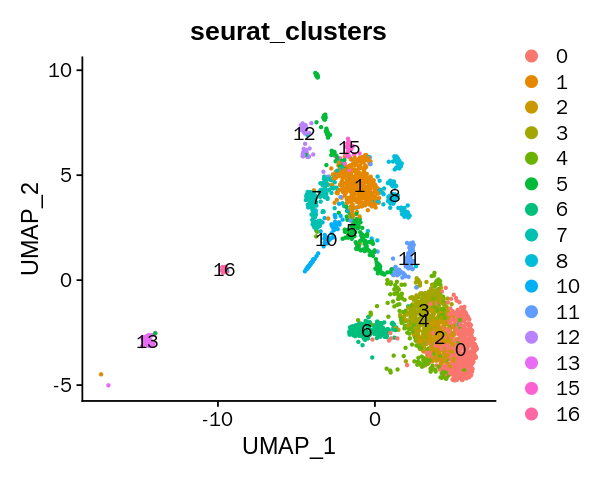

In [35]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [36]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# DC

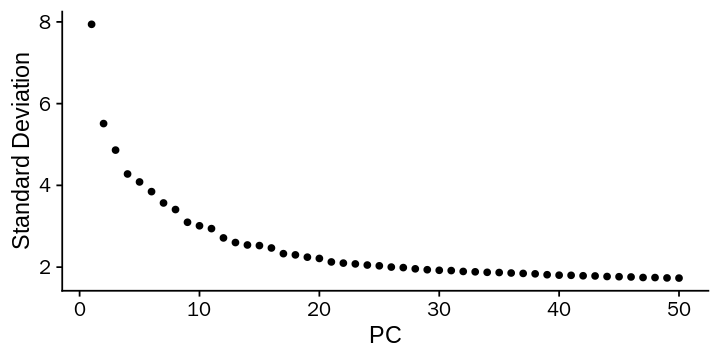

In [37]:
temp = merged_data[,merged_data$major %in% c('DC')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [38]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [39]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A')

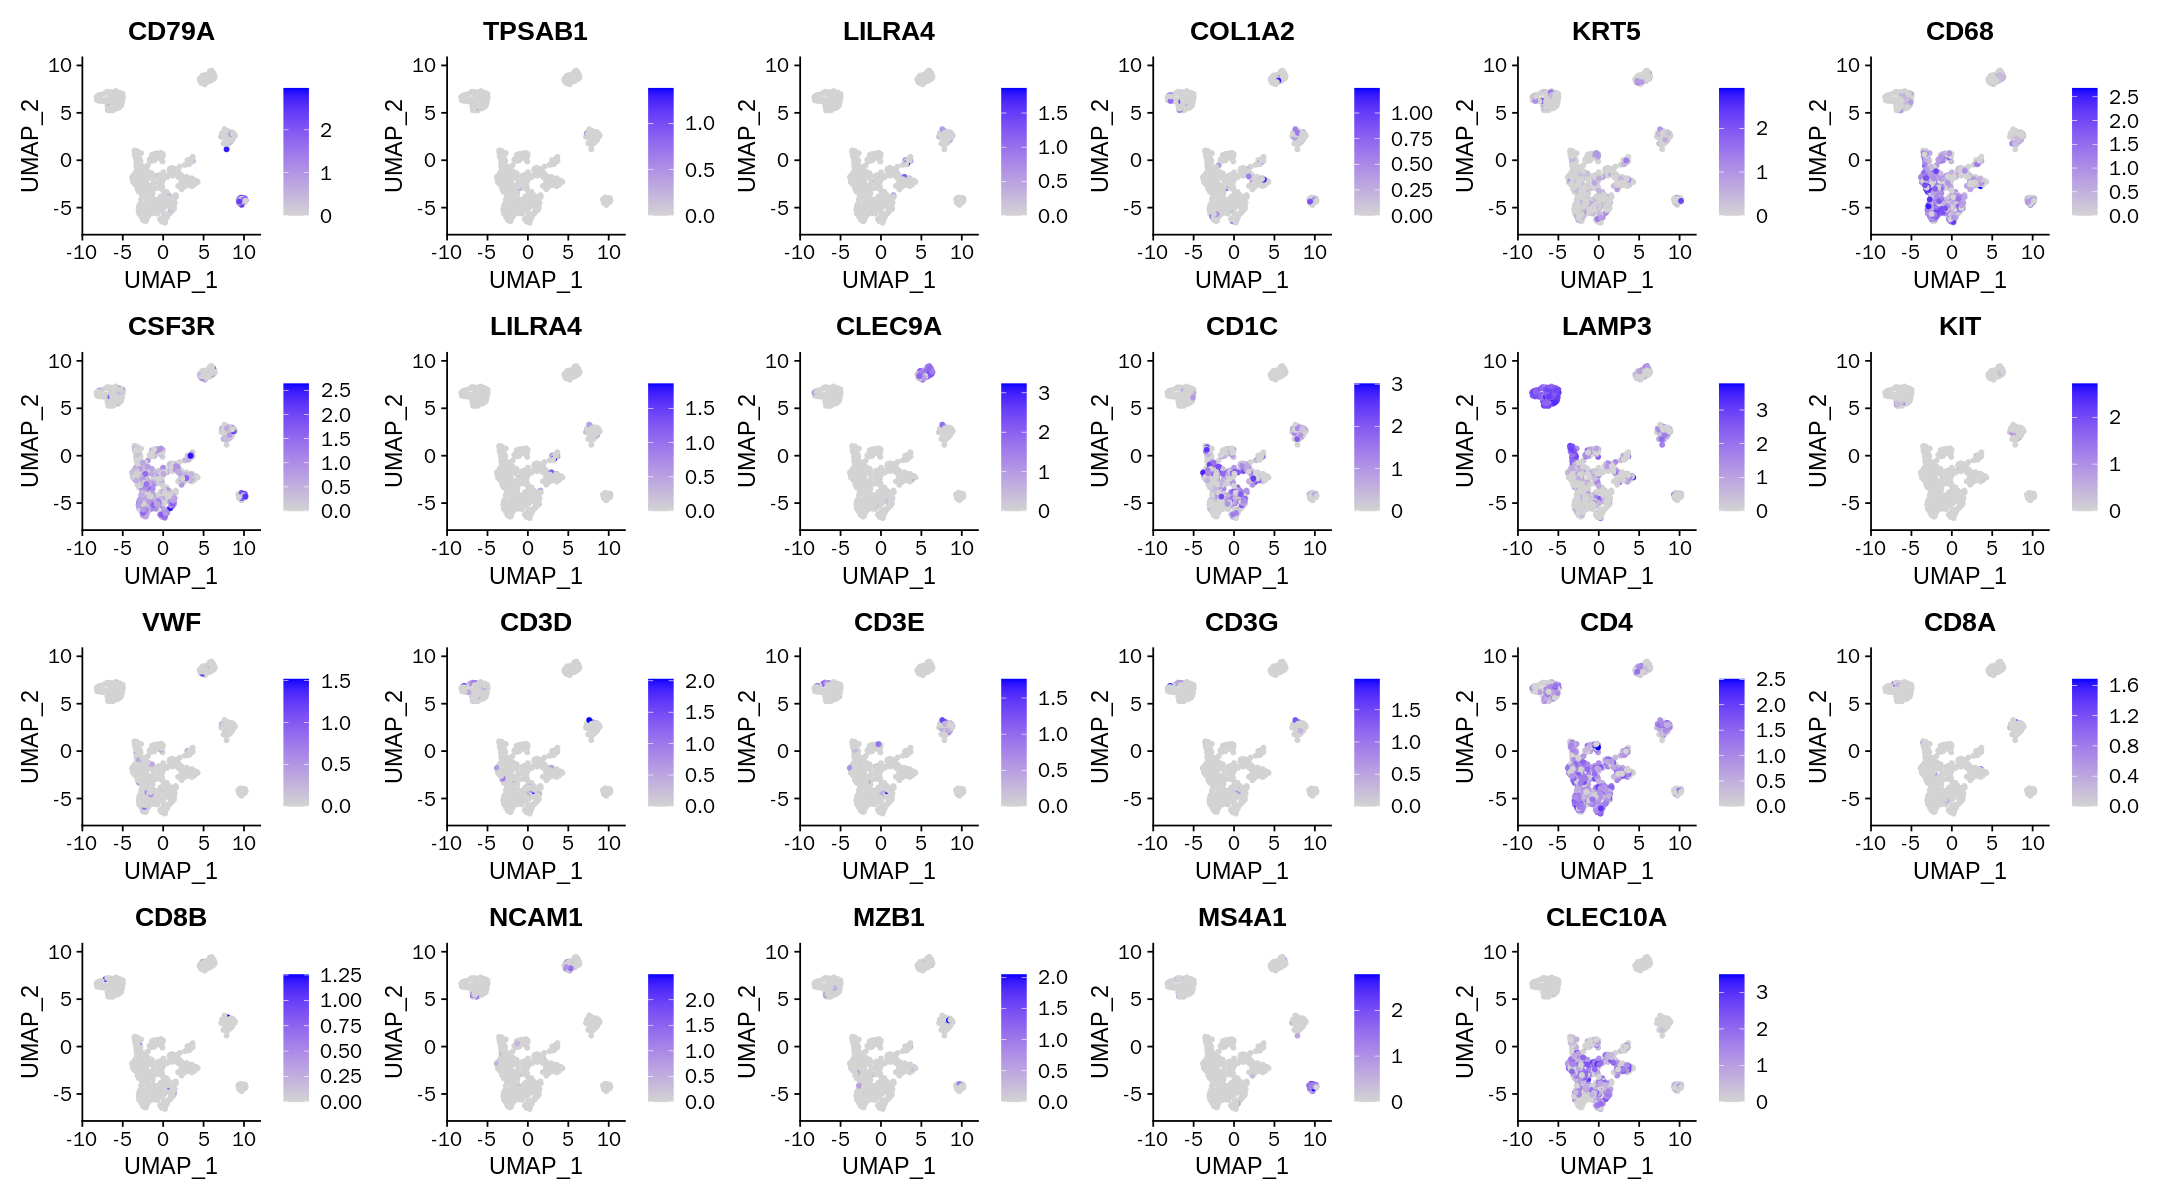

In [40]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

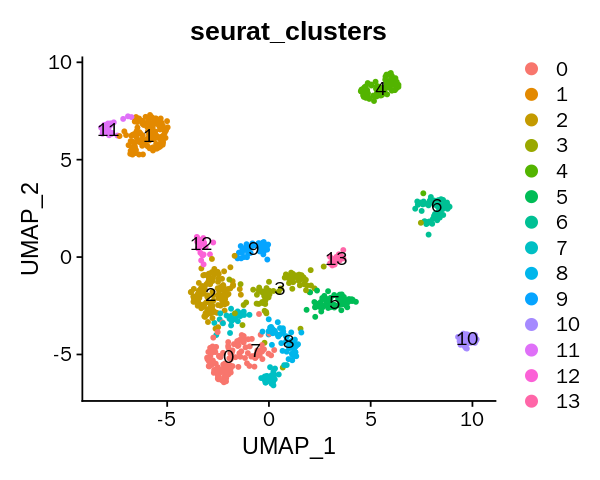

In [41]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [42]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('10','0','9','13','6')]

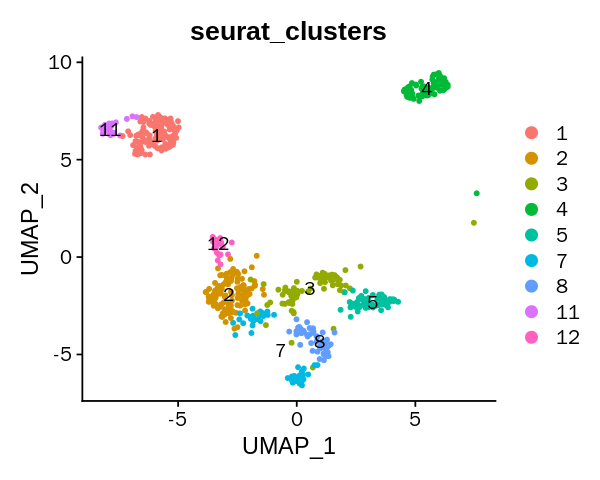

In [43]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [44]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Macrophage

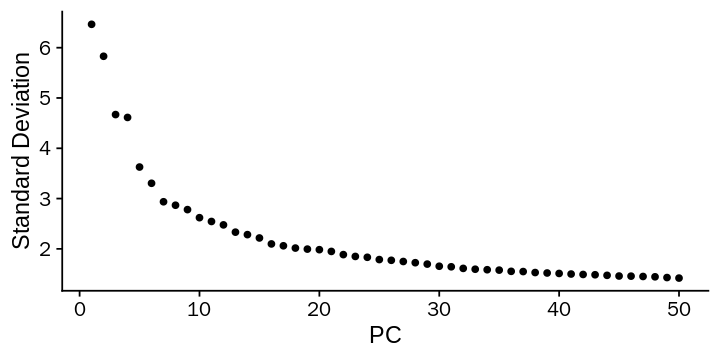

In [45]:
temp = merged_data[,merged_data$major %in% c('Macrophage')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [46]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [47]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A')

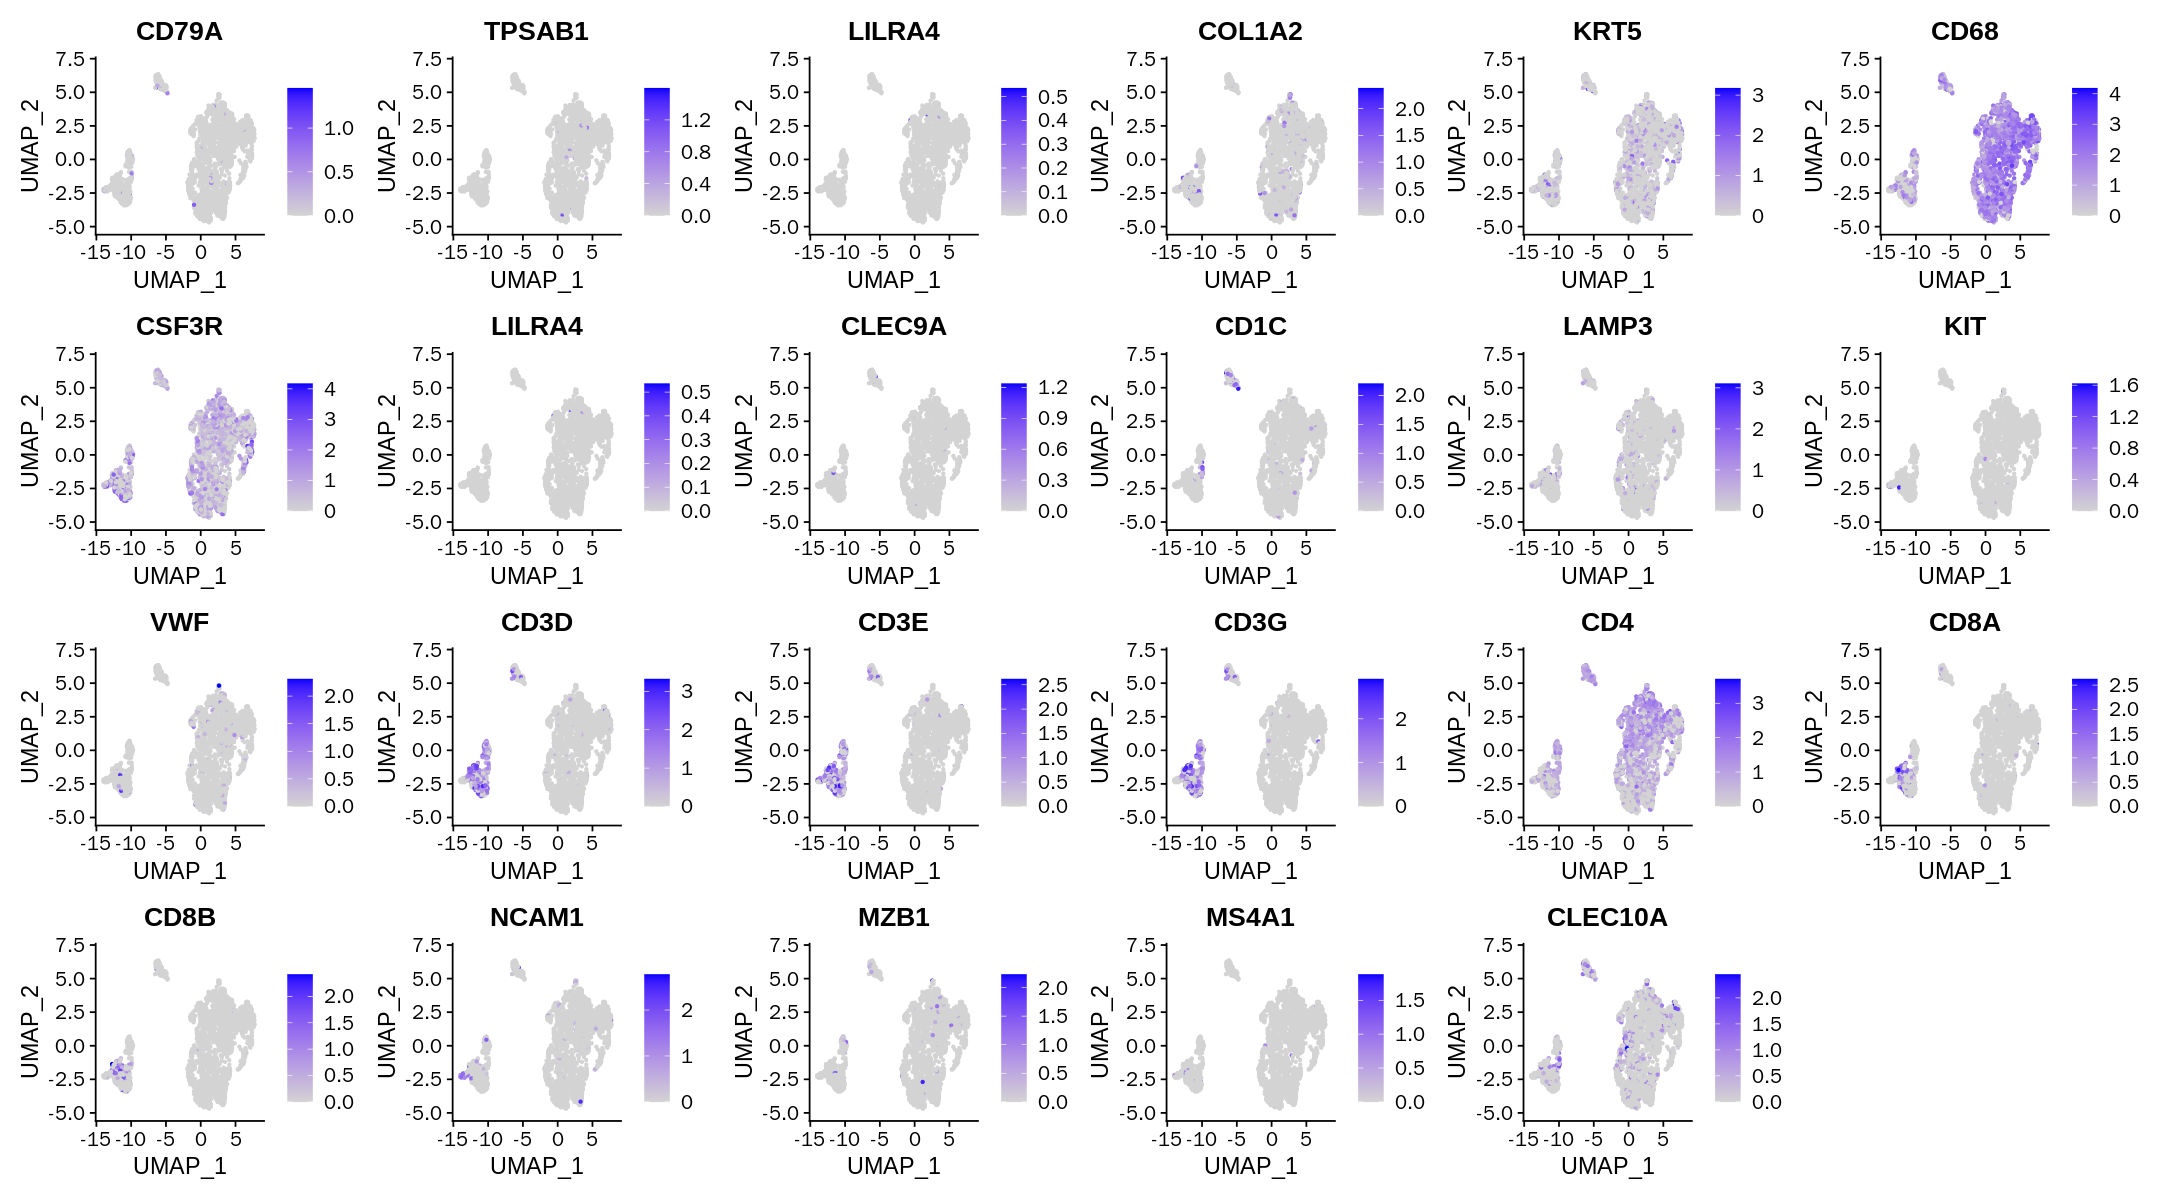

In [48]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

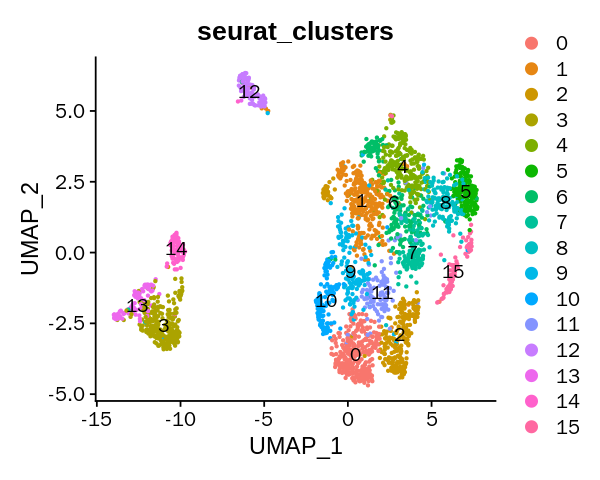

In [49]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [50]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('13','3','14','12')]

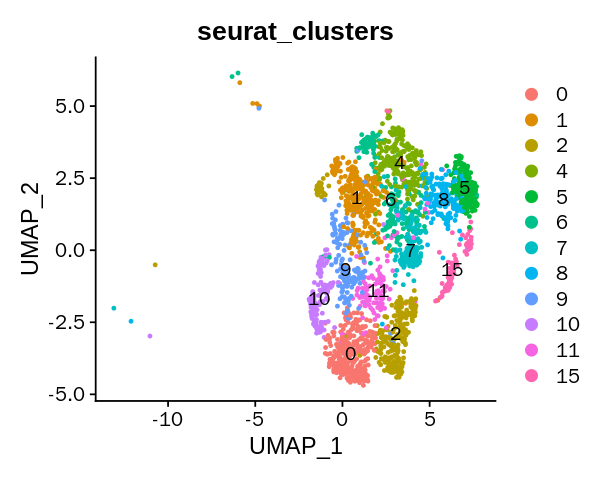

In [51]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [52]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Monocyte

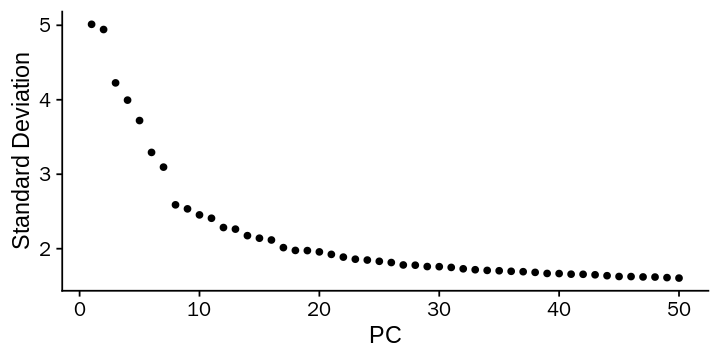

In [53]:
temp = merged_data[,merged_data$major %in% c('Monocyte')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [54]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [55]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A')

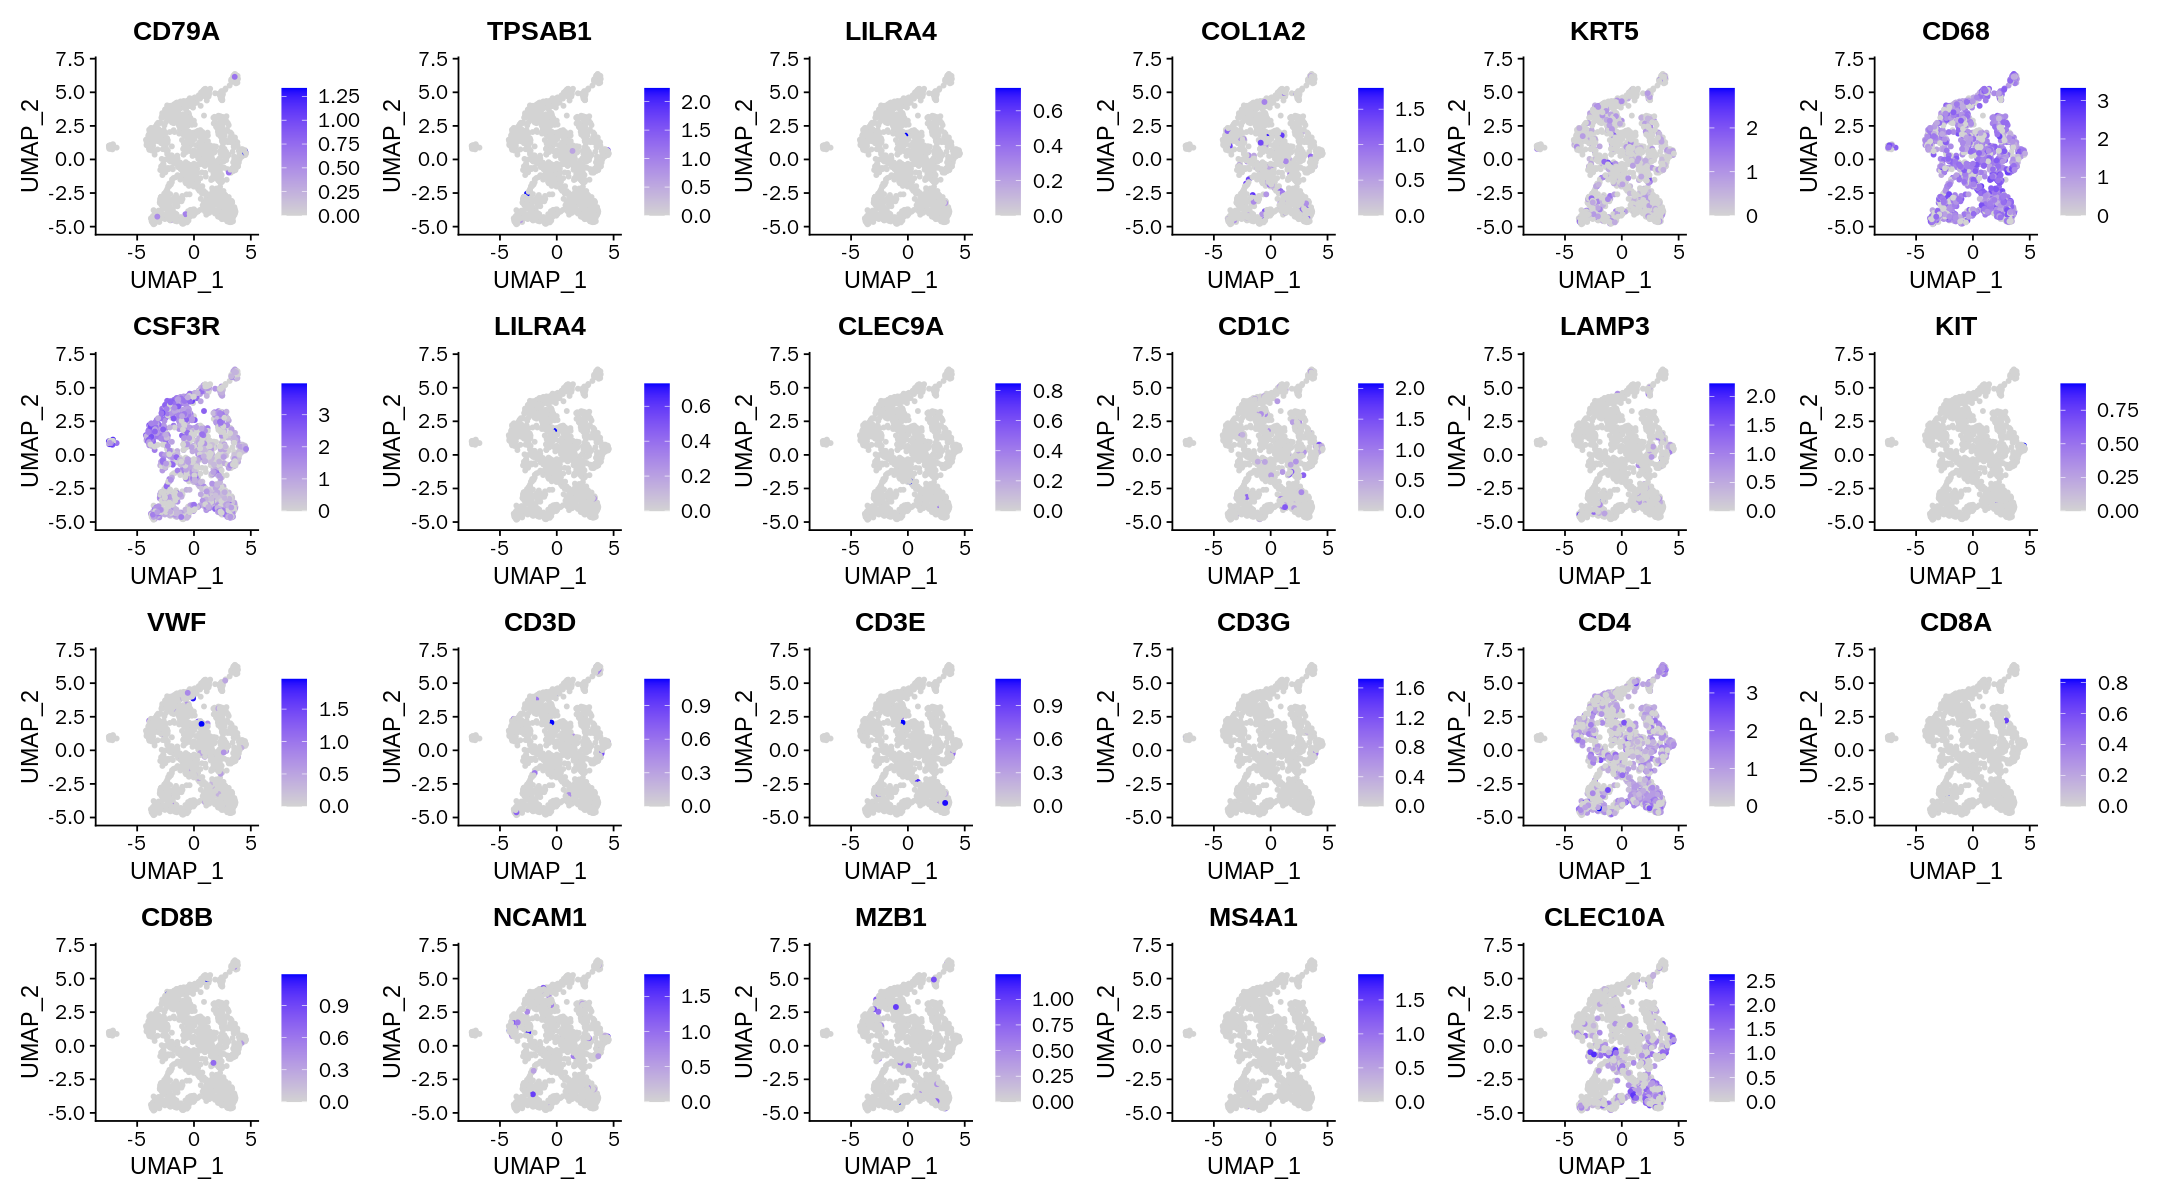

In [56]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

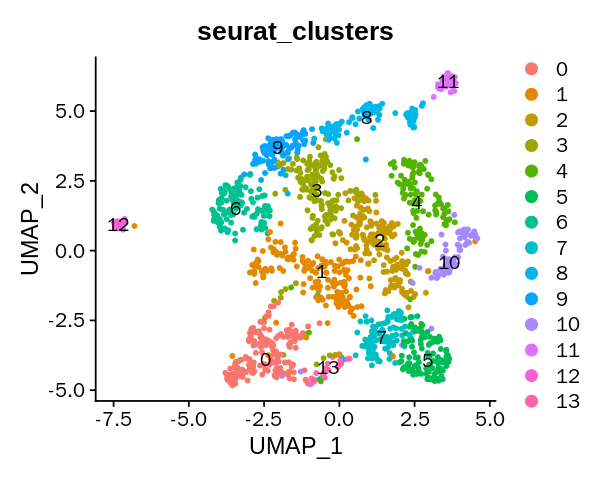

In [57]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

# Neutrophil

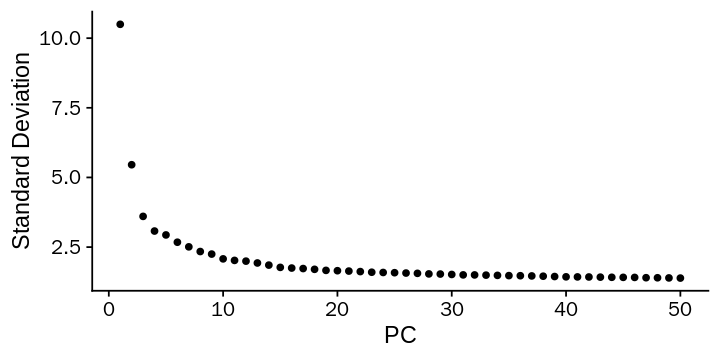

In [58]:
temp = merged_data[,merged_data$major %in% c('Neutrophil')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [59]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [60]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A','AQP9')

Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of LILRA4.”
Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of LILRA4.”


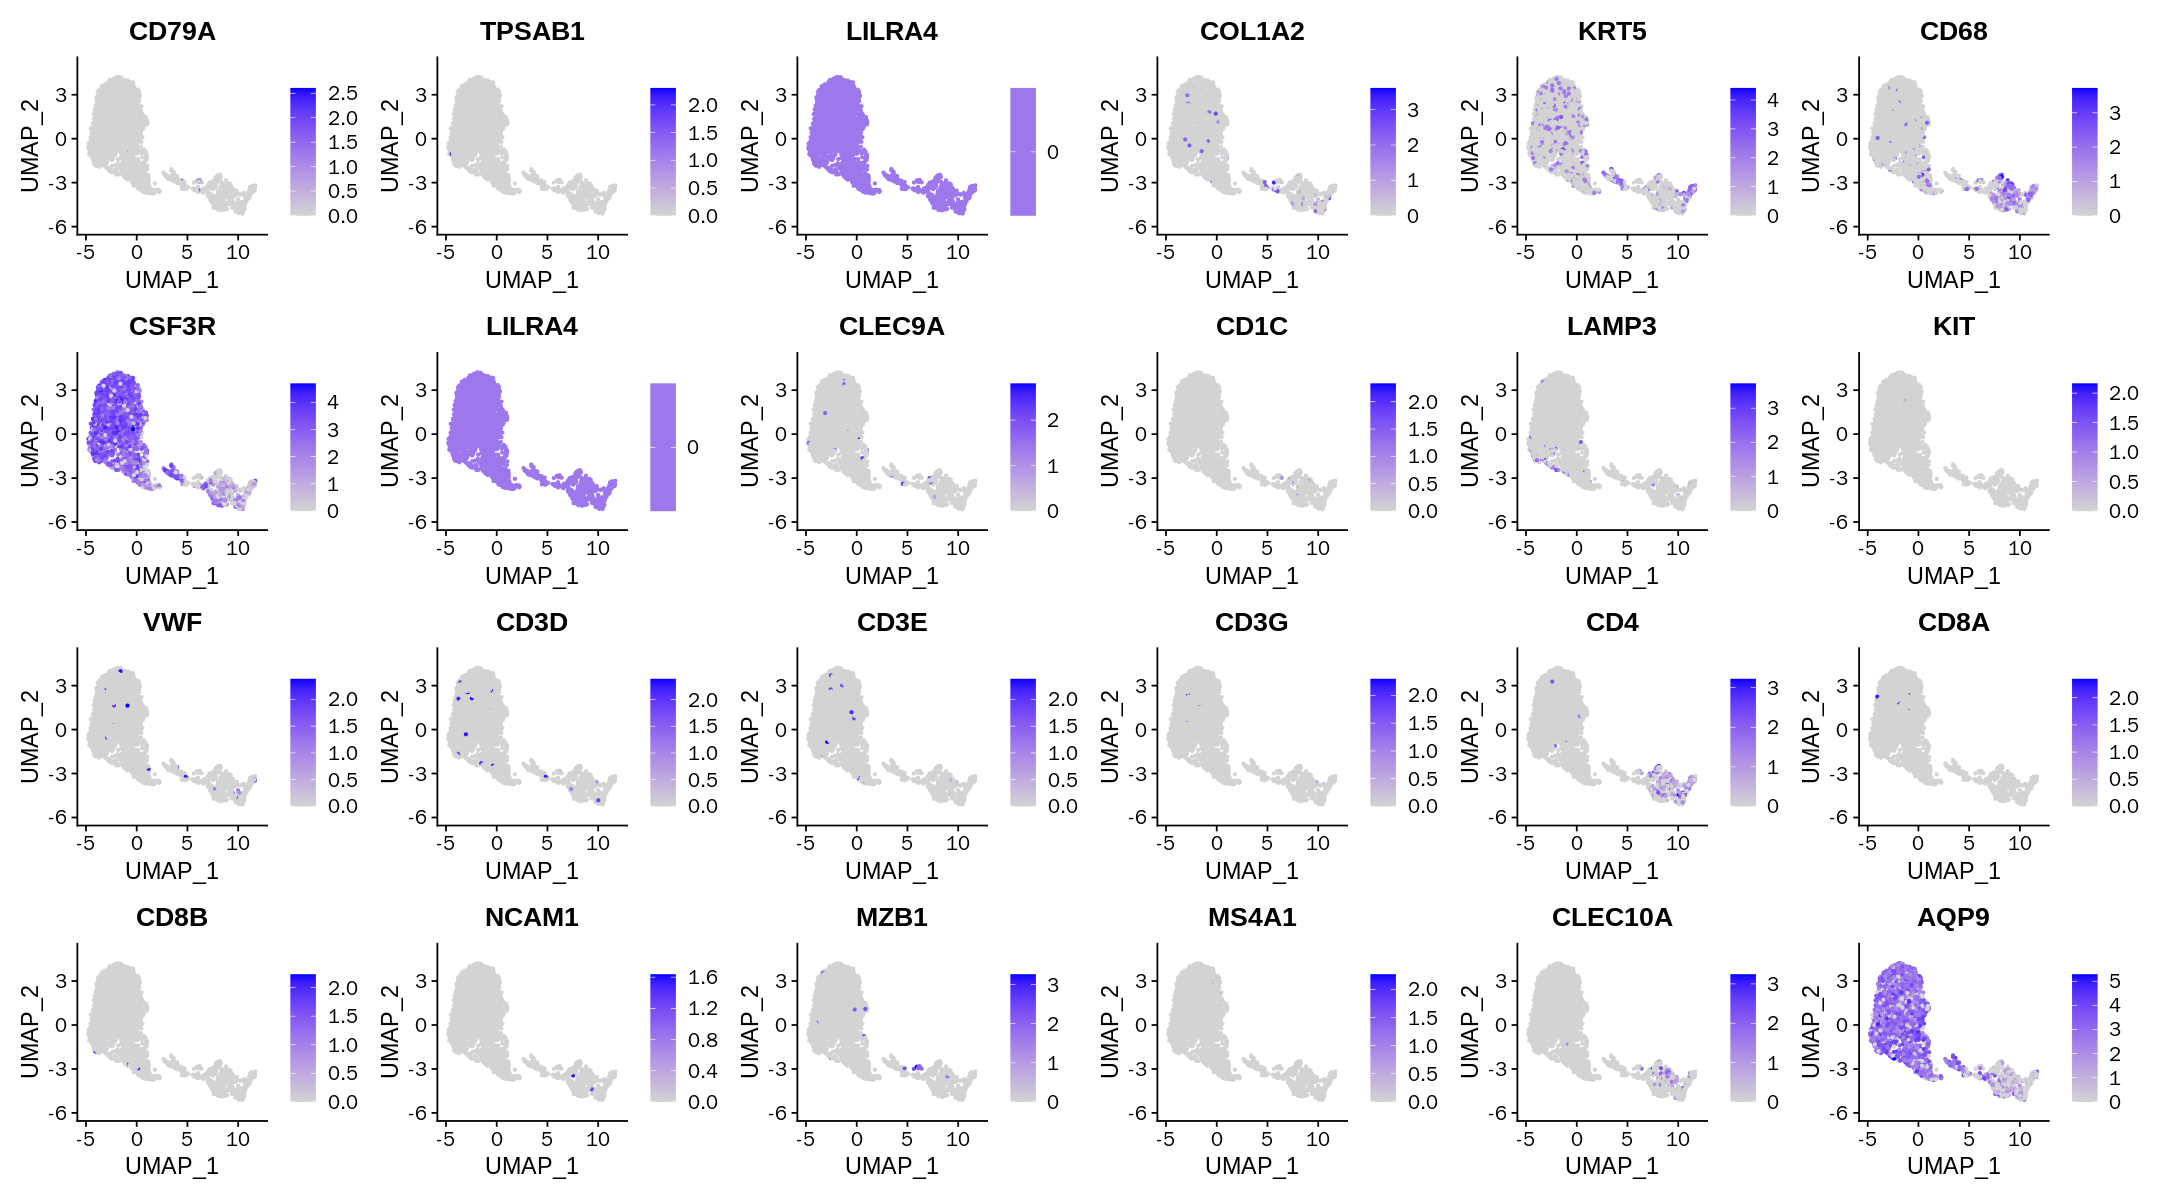

In [61]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

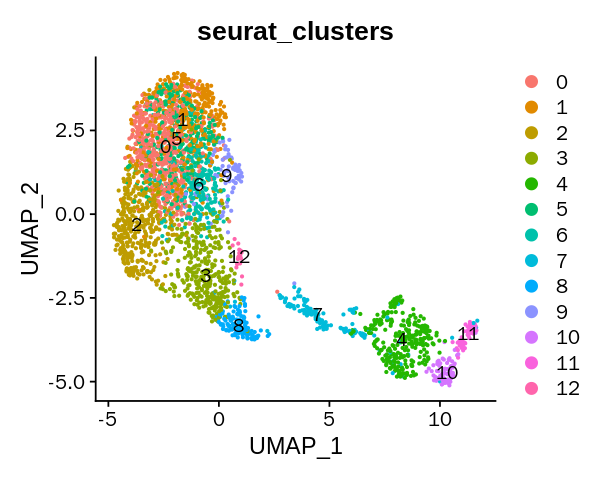

In [62]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [63]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('4','10','11')]

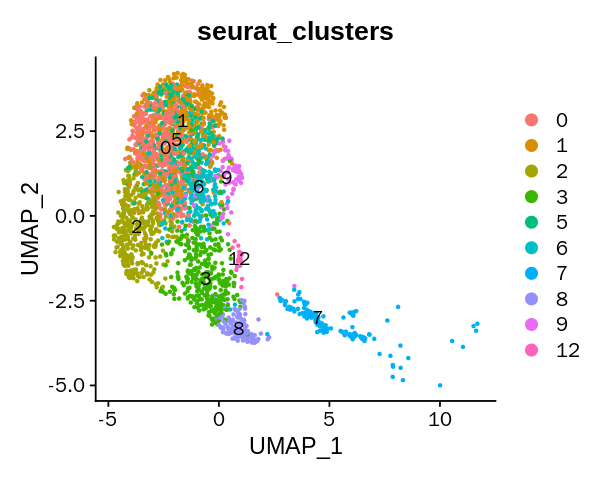

In [64]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [65]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Fibroblast

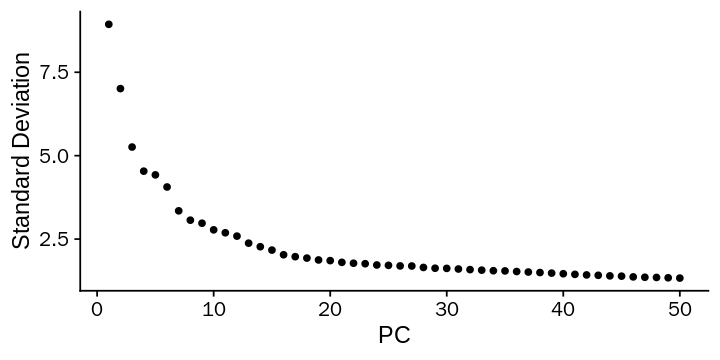

In [66]:
temp = merged_data[,merged_data$major %in% c('Fibroblast')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [67]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [68]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A','AQP9')

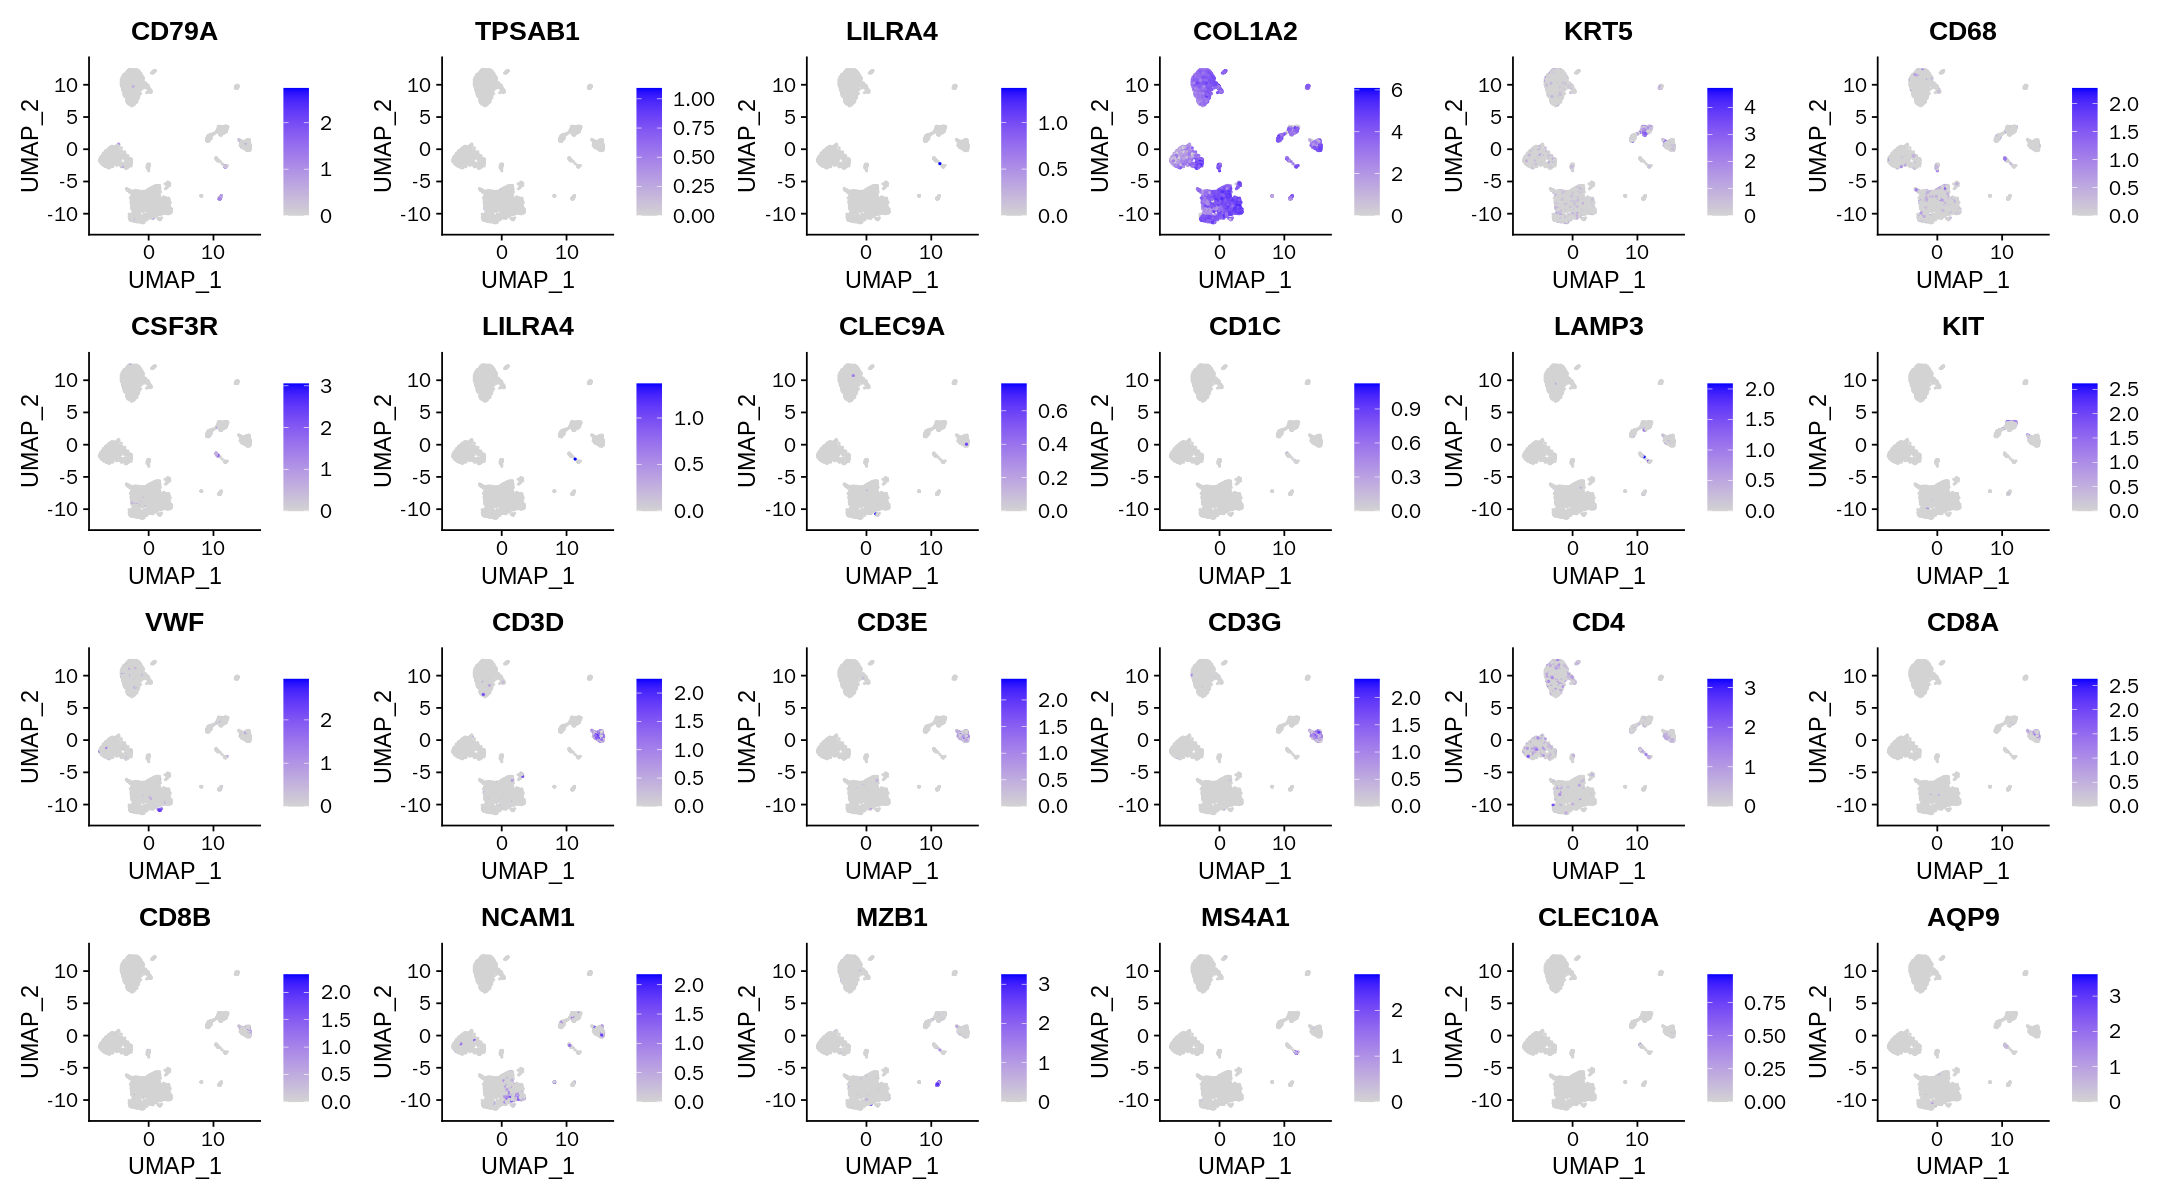

In [69]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

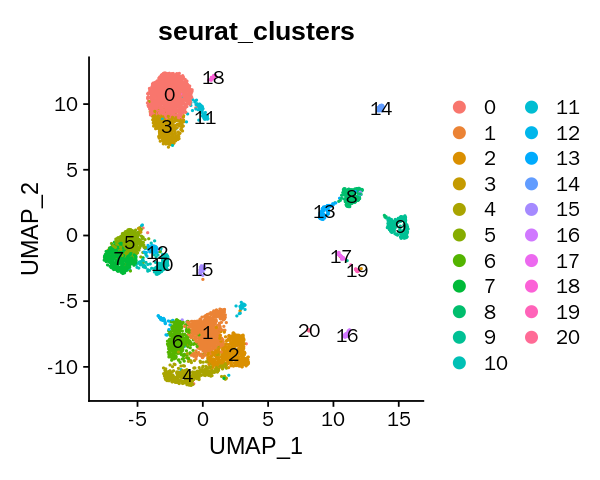

In [70]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [71]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('16','8','9')]

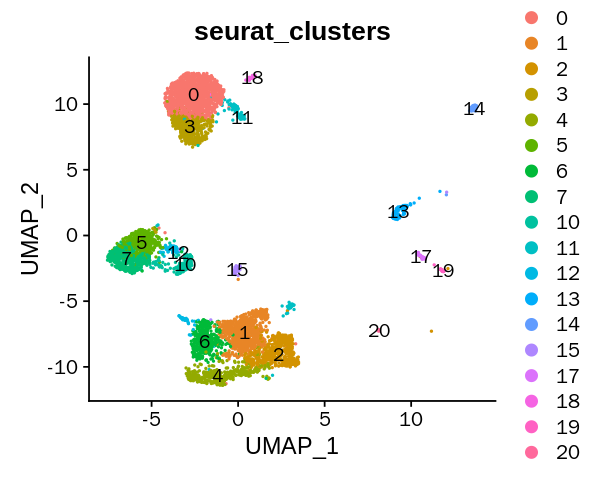

In [72]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [73]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Endothelial

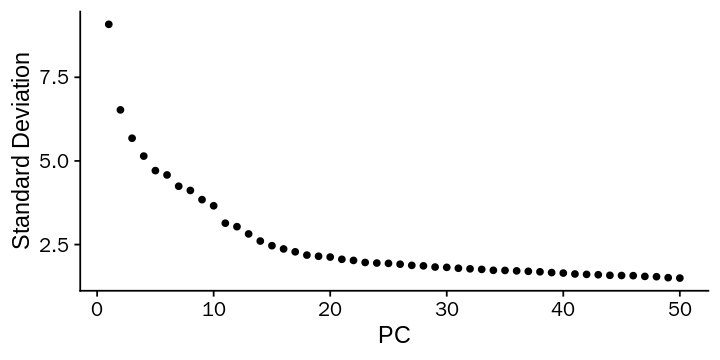

In [74]:
temp = merged_data[,merged_data$major %in% c('Endothelial')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [75]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [76]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A','AQP9')

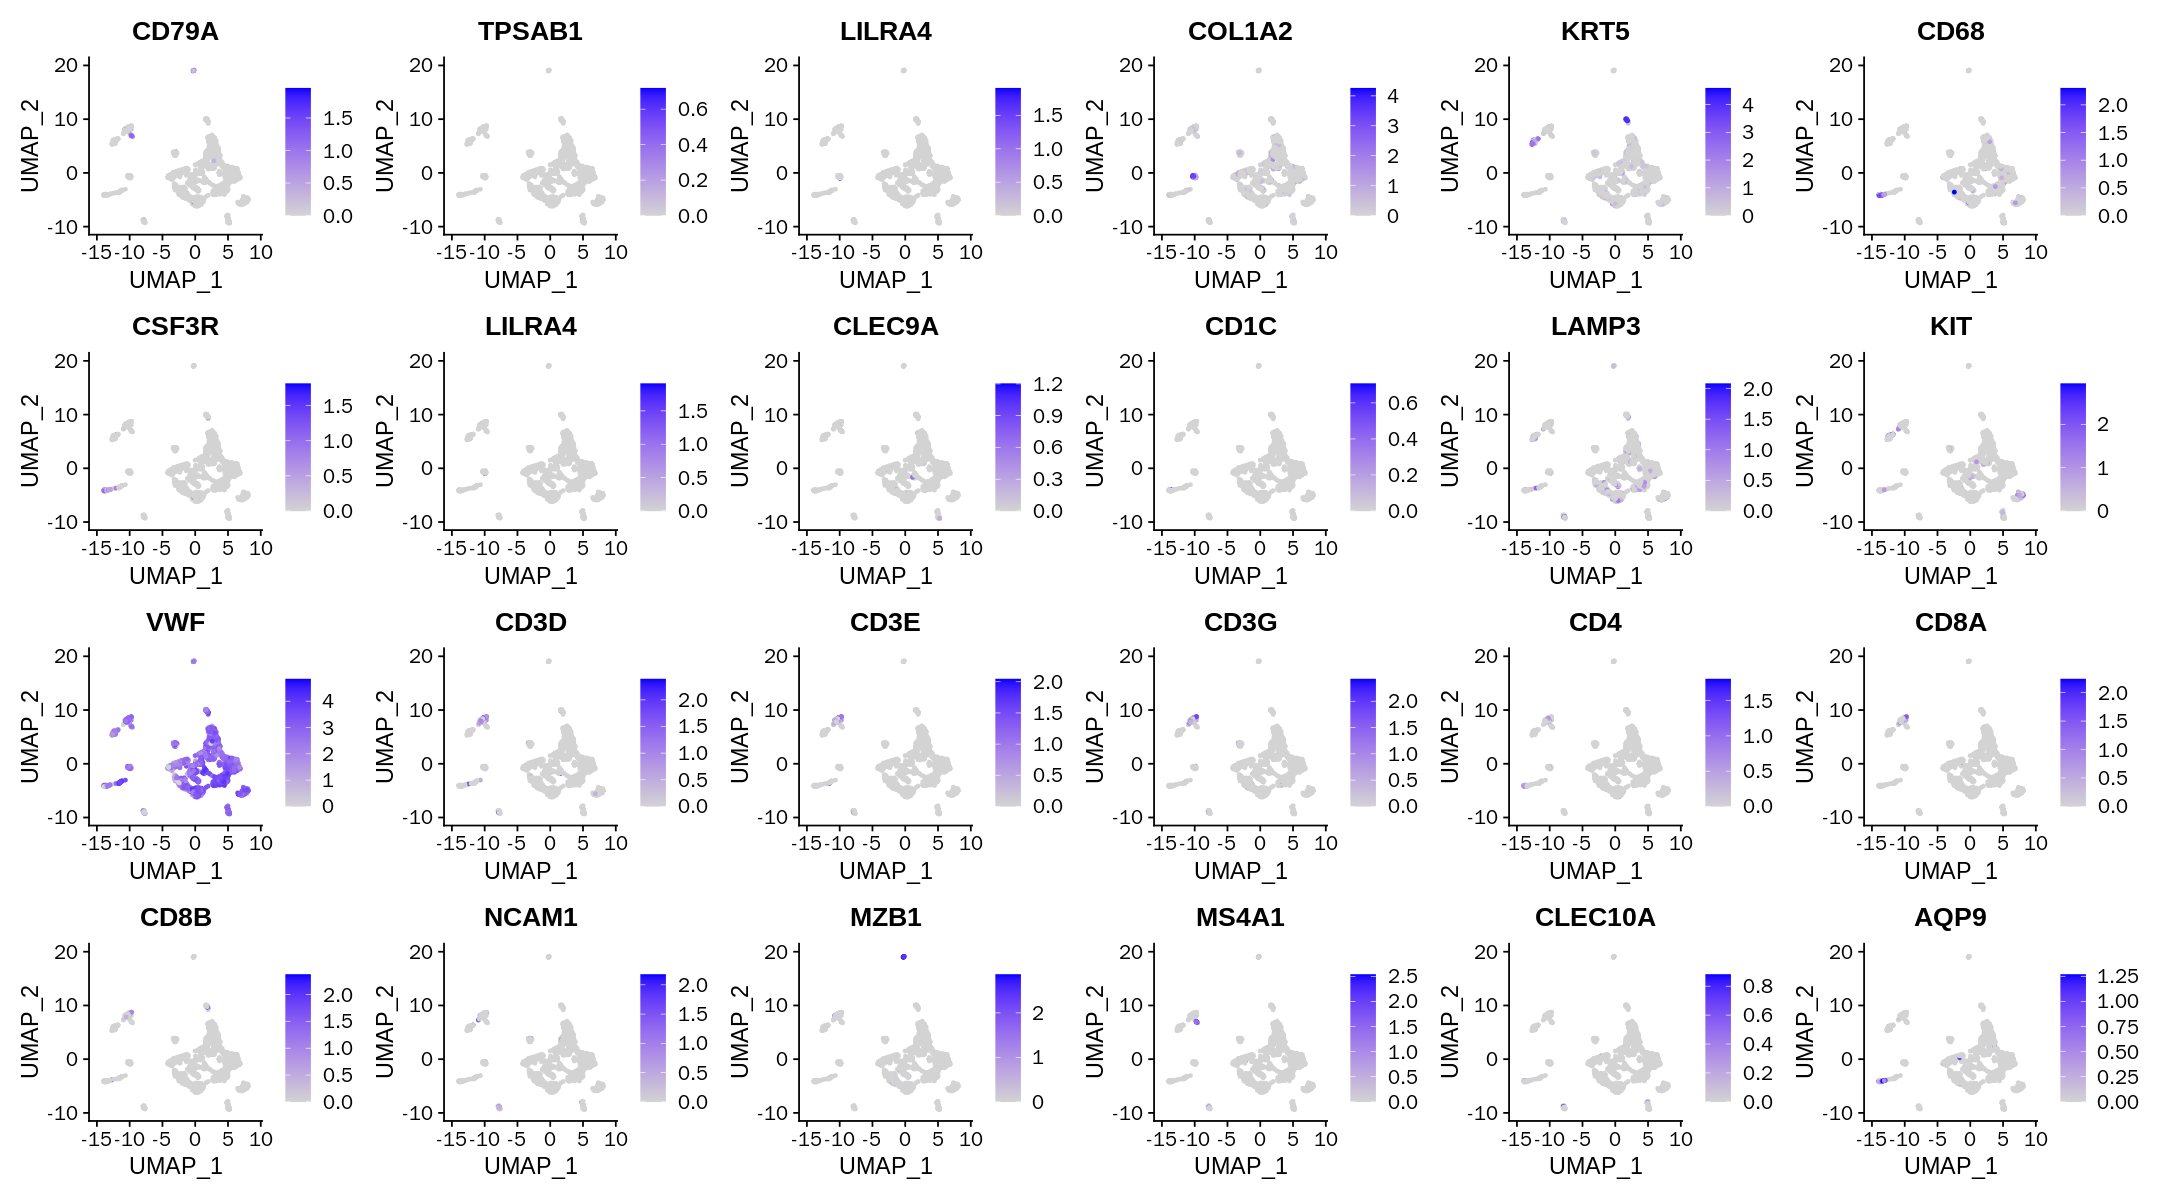

In [77]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

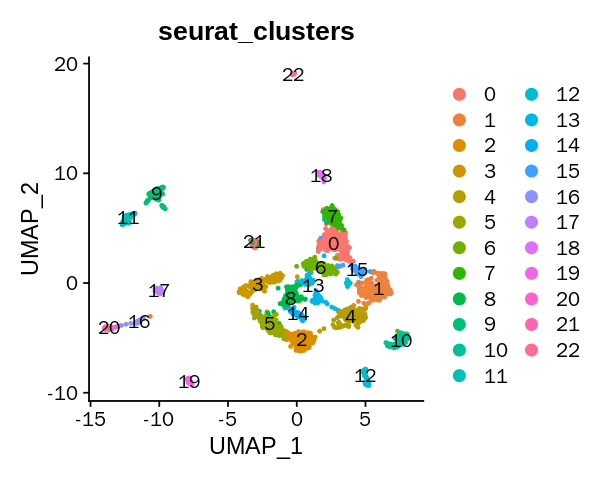

In [78]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [79]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('9','11','18','20','22')]

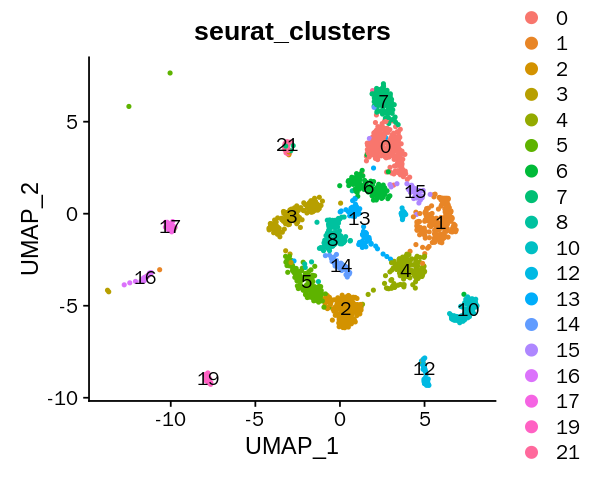

In [80]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [81]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# Mast

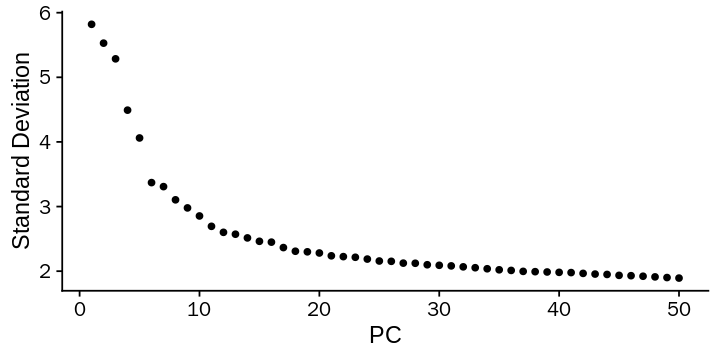

In [82]:
temp = merged_data[,merged_data$major %in% c('Mast')]
sub = CreateSeuratObject(counts = temp@assays$RNA@counts, project = "epi") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 1000) %>% 
    ScaleData(verbose = FALSE) %>% 
    RunPCA(pc.genes = epi@var.genes, npcs = 50, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(sub,ndims = 50)

In [83]:
sub@meta.data = temp@meta.data
sub = RunHarmony(sub, 'Source', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:25, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [84]:
markers = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT','VWF',"CD3D","CD3E","CD3G","CD4","CD8A","CD8B","NCAM1",'MZB1','MS4A1','CLEC10A','AQP9')

Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of LILRA4.”
Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of LILRA4.”
Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of CLEC9A.”
Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of CD1C.”
Warning message in FeaturePlot(sub, features = markers, ncol = 6):
“All cells have the same value (0) of CLEC10A.”


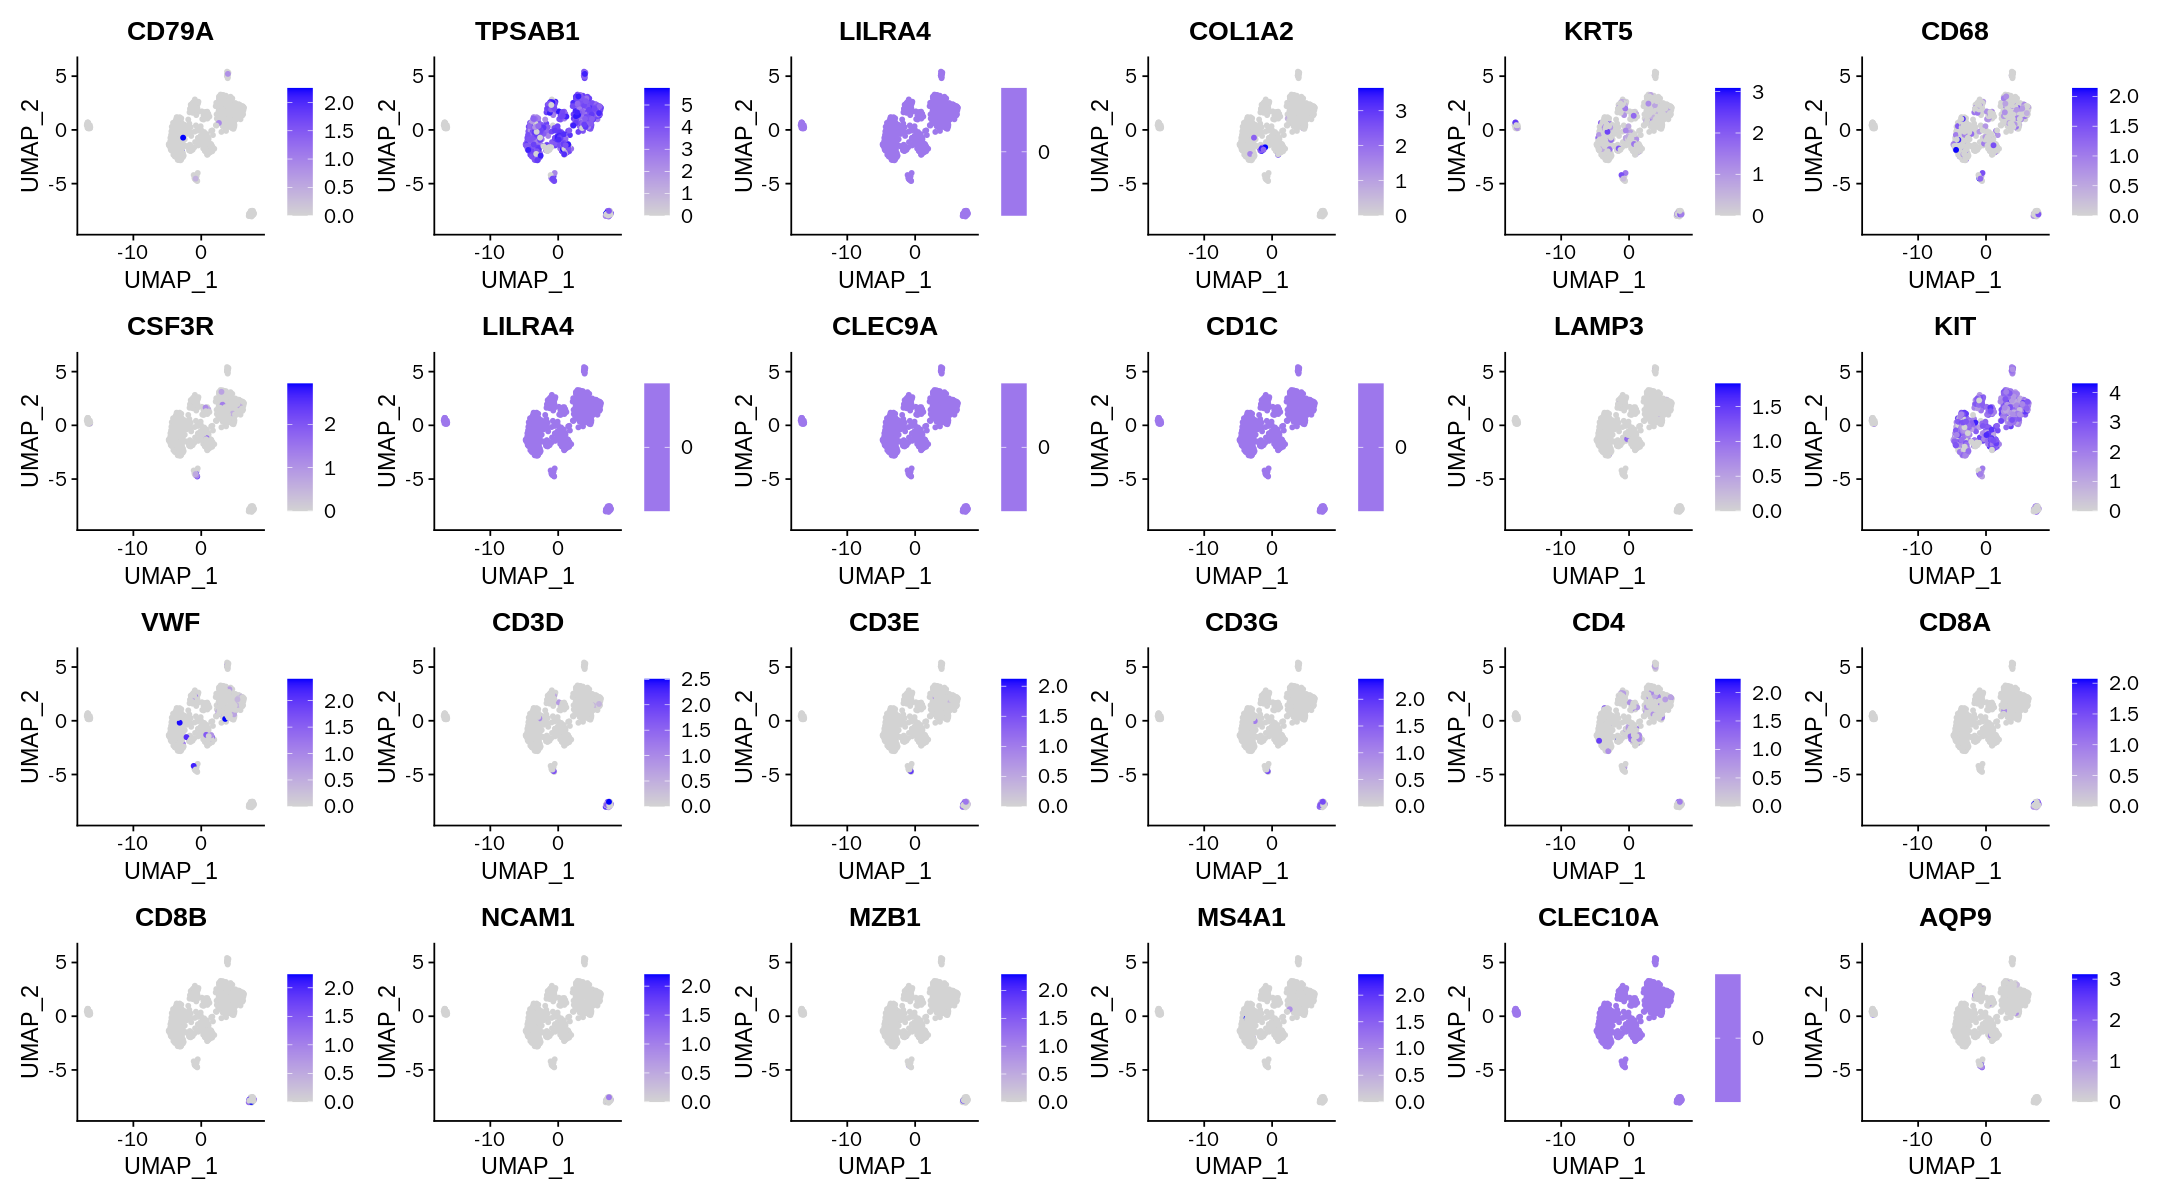

In [85]:
options(repr.plot.width = 18, repr.plot.height = 10)
FeaturePlot(sub,features = markers, ncol = 6)

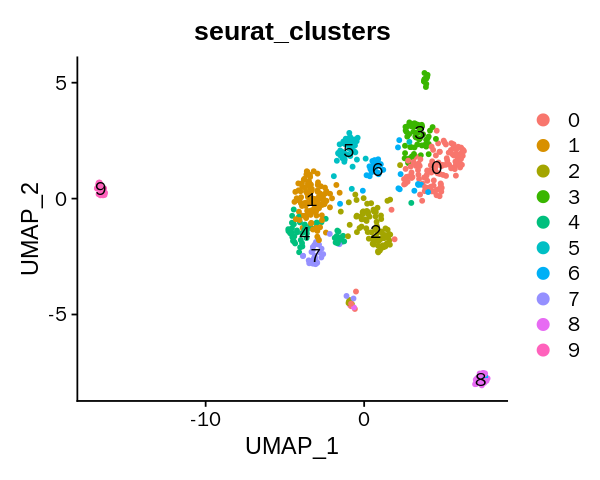

In [86]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub,group.by = 'seurat_clusters',label = TRUE)

In [87]:
rm_barcode = colnames(sub)[sub$seurat_clusters %in% c('4','8')]

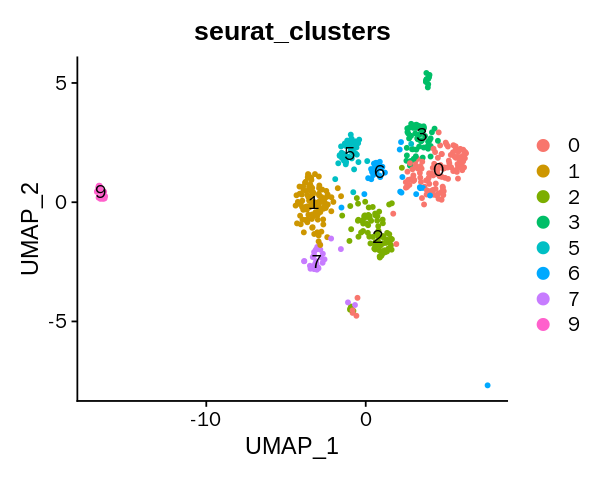

In [88]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(sub[,!colnames(sub) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [89]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# epi

In [90]:
epi = readRDS('~/HPV/res/seurat_rds/epi.rds')

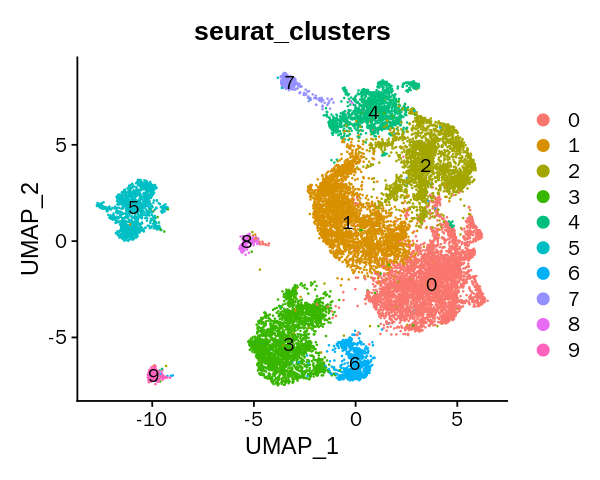

In [91]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(epi,group.by = 'seurat_clusters',label = TRUE)

In [92]:
rm_barcode = colnames(epi)[epi$seurat_clusters %in% c('5','7','8','9')]

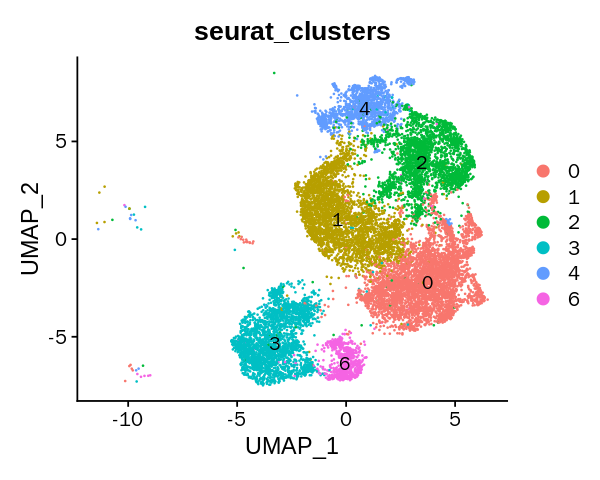

In [93]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(epi[,!colnames(epi) %in% rm_barcode],group.by = 'seurat_clusters',label = TRUE)

In [94]:
merged_data = merged_data[,!colnames(merged_data) %in% rm_barcode]

# save

In [95]:
dim(merged_data)

[1] 28849 78413

In [96]:
saveRDS(merged_data, file = '~/HPV/res/seurat_rds/merged_data_clean.rds')